# Projects_title: Agricultural Product Distribution Forecasting: 
# Predicting Demand to Optimize Harvest Schedules

## Import Packages

In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations and handling arrays
from scipy import stats  # Statistical functions and hypothesis testing
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced statistical data visualization

from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test for checking stationarity
from statsmodels.tsa.arima.model import ARIMA  # ARIMA model for time series forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Autocorrelation and Partial Autocorrelation plots

from prophet import Prophet  # Facebook Prophet model for time series forecasting

from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor for predictive modeling
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error  # Model evaluation metrics

import warnings  # Suppress warnings
warnings.filterwarnings('ignore')  # Ignore warnings to keep the output clean

## Data Collection 

In [6]:
df = pd.read_csv('Agric_data.csv')

## Data Exploration and Understanding 

In [7]:
df.head()

Date       Product  Quantity_Sold      Revenue  Temperature_Celsius  \
0  2015-01-01  Strawberries          690.0    70.298339             9.680289   
1  2015-01-01        Apples          354.0   599.863944             9.680289   
2  2015-01-01      Tomatoes          275.0   199.249505             9.680289   
3  2015-01-01        Apples         1079.0  1136.111770             9.680289   
4  2015-01-01  Strawberries         1008.0   111.653303             9.680289   

   Rainfall_mm Location  Transportation_Cost  Labor_Cost    Customer  \
0     0.077279  Field C                   20   13.771809  Customer B   
1     0.077279  Field A                   50    9.702670  Customer C   
2     0.077279  Field C                   20   22.356498  Customer C   
3     0.077279  Field A                   50   15.691418  Customer A   
4     0.077279  Field B                   30   17.473353  Customer B   

   Quality_Score  Inventory_Level  
0       0.769340           3608.0  
1       0.861953           3982.0  
2       0.861953           3708.0  
3       0.876056           3455.0  
4       0.769340           1504.0

In [8]:
df.tail()

Date   Product  Quantity_Sold     Revenue  Temperature_Celsius  \
28383  2020-06-23    Apples          468.0  576.920620                  NaN   
28384  2020-06-23   Lettuce         1026.0  378.742467                  NaN   
28385  2020-06-23   Carrots            NaN  105.180941                  NaN   
28386  2020-06-23  Tomatoes            NaN  362.611833                  NaN   
28387  2020-06-23   Lettuce          863.0  321.862722                  NaN   

       Rainfall_mm Location  Transportation_Cost  Labor_Cost    Customer  \
28383          NaN  Field B                   30   11.501196  Customer B   
28384          NaN  Field A                   50    6.842419  Customer A   
28385          NaN  Field A                   50   12.925026  Customer B   
28386          NaN  Field B                   30   24.831773  Customer C   
28387          NaN  Field C                   20   19.554162  Customer C   

       Quality_Score  Inventory_Level  
28383       0.769340            928.0  
28384       0.876056           4720.0  
28385       0.769340              NaN  
28386       0.861953              NaN  
28387       0.861953           2307.0

## Getting a Discriptive Statistics of the Numerical Columns of the Dataset

In [10]:
df.describe()

Quantity_Sold       Revenue  Temperature_Celsius   Rainfall_mm  \
count   28382.000000  28388.000000         28377.000000  28377.000000   
mean      609.197097    405.584444            20.024600      7.393332   
std       316.521726    485.206130             8.701719      4.316396   
min        41.000000      3.546003             5.011709      0.003963   
25%       334.000000     94.572138            12.435564      3.621238   
50%       607.500000    256.513966            20.124216      7.358936   
75%       884.000000    513.624224            27.544882     11.062843   
max      1195.000000   3382.034941            34.985404     14.997572   

       Transportation_Cost    Labor_Cost  Quality_Score  Inventory_Level  
count         28388.000000  28388.000000   28388.000000     28382.000000  
mean             33.465901     17.573430       0.835909      2617.164012  
std              12.466448      7.232465       0.047362      1189.840946  
min              20.000000      5.000083       0.769340        66.000000  
25%              20.000000     11.289710       0.769340      1621.000000  
50%              30.000000     17.586134       0.861953      2630.000000  
75%              50.000000     23.869033       0.876056      3597.000000  
max              50.000000     29.998989       0.876056      5172.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28388 entries, 0 to 28387
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 28388 non-null  object 
 1   Product              28388 non-null  object 
 2   Quantity_Sold        28382 non-null  float64
 3   Revenue              28388 non-null  float64
 4   Temperature_Celsius  28377 non-null  float64
 5   Rainfall_mm          28377 non-null  float64
 6   Location             28388 non-null  object 
 7   Transportation_Cost  28388 non-null  int64  
 8   Labor_Cost           28388 non-null  float64
 9   Customer             28388 non-null  object 
 10  Quality_Score        28388 non-null  float64
 11  Inventory_Level      28382 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.6+ MB


In [12]:
df['Product'].value_counts()

Product
Strawberries    5804
Lettuce         5709
Tomatoes        5707
Apples          5619
Carrots         5549
Name: count, dtype: int64

In [13]:
df['Location'].value_counts()

Location
Field A    9561
Field B    9544
Field C    9283
Name: count, dtype: int64

In [14]:
df['Customer'].value_counts()

Customer
Customer A    9608
Customer B    9446
Customer C    9334
Name: count, dtype: int64

In [15]:
df['Quality_Score'].max()

0.8760562913970549

In [8]:
df['Quality_Score'].min()

0.7693399232399072

In [10]:
missing_values = df.isnull().sum()
missing_values

Date                    0
Product                 0
Quantity_Sold           6
Revenue                 0
Temperature_Celsius    11
Rainfall_mm            11
Location                0
Transportation_Cost     0
Labor_Cost              0
Customer                0
Quality_Score           0
Inventory_Level         6
dtype: int64

In [12]:
missing_values = df.isnull().sum()/len(df)*100
missing_values

Date                   0.000000
Product                0.000000
Quantity_Sold          0.021136
Revenue                0.000000
Temperature_Celsius    0.038749
Rainfall_mm            0.038749
Location               0.000000
Transportation_Cost    0.000000
Labor_Cost             0.000000
Customer               0.000000
Quality_Score          0.000000
Inventory_Level        0.021136
dtype: float64

## Check for outliers

In [15]:
# For all the numerical values
num_df = ('Quantity_Sold', 'Revenue', 'Temperature_Celsius', 'Rainfall_mm', 'Transportation_Cost', 'Labor_Cost', 'Quality_Score', 'Inventory_Level')
for col in num_df:
    z = np.abs(stats.zscore(df[col], nan_policy = 'omit'))
    outliers = df[col][z>3]
    print(f'{col} has {len(outliers)}')

Quantity_Sold has 0
Revenue has 830
Temperature_Celsius has 0
Rainfall_mm has 0
Transportation_Cost has 0
Labor_Cost has 0
Quality_Score has 0
Inventory_Level has 0


## Calculating the z-score to ascertain outliers of the columns with missing values
**cols contains the columns with missing values**

In [18]:
# cols contains the columns with missing values

cols = ('Quantity_Sold', 'Temperature_Celsius', 'Rainfall_mm', 'Inventory_Level')
for col in cols:
    z = np.abs(stats.zscore(df[col], nan_policy = 'omit'))
    outliers = df[col][z>3]
    print(f'{col} has {len(outliers)}')

Quantity_Sold has 0
Temperature_Celsius has 0
Rainfall_mm has 0
Inventory_Level has 0


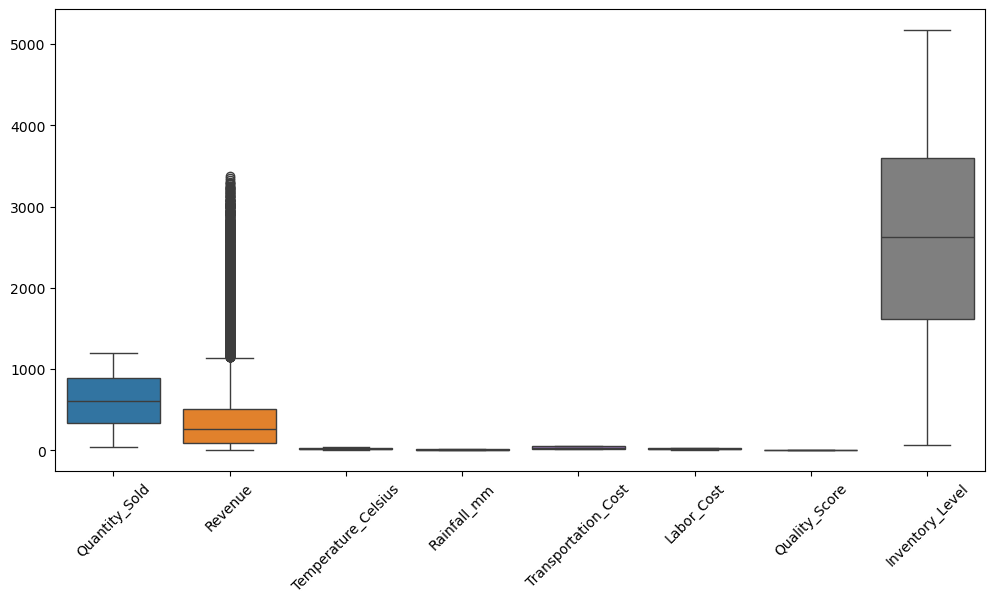

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Quantity_Sold', 'Revenue', 'Temperature_Celsius', 'Rainfall_mm', 
                     'Transportation_Cost', 'Labor_Cost', 'Quality_Score', 'Inventory_Level']])
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Revenue'>

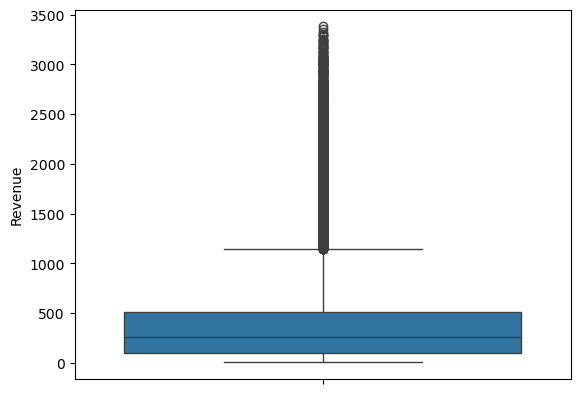

In [21]:
sns.boxplot(data = df['Revenue'])

## Checking for skewness

In [23]:
num_df = ('Quantity_Sold', 'Revenue', 'Temperature_Celsius', 'Rainfall_mm', 'Transportation_Cost', 'Labor_Cost', 'Quality_Score', 'Inventory_Level')
for col in num_df:
    skew = df[col].skew()
    print(f'{col} has a skewness of {skew}')

Quantity_Sold has a skewness of 0.007049968334628765
Revenue has a skewness of 2.5690483358517513
Temperature_Celsius has a skewness of -0.005244633606917498
Rainfall_mm has a skewness of 0.017580193058957767
Transportation_Cost has a skewness of 0.3664320653183987
Labor_Cost has a skewness of -0.010920567743079486
Quality_Score has a skewness of -0.6632186089403818
Inventory_Level has a skewness of -0.006928239182168006


In [24]:
# cols contains the columns with missing values
cols = ('Quantity_Sold', 'Temperature_Celsius', 'Rainfall_mm', 'Inventory_Level')
for col in cols:
    skew = df[col].skew()
    print(f'{col} has a skew of {skew}')

# Since all values are very close to 0, these variables are approximately normally distributed.

Quantity_Sold has a skew of 0.007049968334628765
Temperature_Celsius has a skew of -0.005244633606917498
Rainfall_mm has a skew of 0.017580193058957767
Inventory_Level has a skew of -0.006928239182168006


**The 4 columns with missing values have their skewness very close to zero, this implies that they are approximately normally distributed**
- Mean (for numerical varibles) or mode (for categorical variables) is suitable to fill up the missing values when the data is not skewed
- Whether the data is skewed or not, the  median can be used to fill the missing values 

## Filling the Missing Values with the mean 

In [31]:
# cols contains the columns with missing values
cols = ('Quantity_Sold', 'Temperature_Celsius', 'Rainfall_mm', 'Inventory_Level')
for col in cols:
    df[col].fillna(df[col].mean(), inplace = True)

## Confirm that there are no missing values

In [33]:
df.isnull().sum()

Date                   0
Product                0
Quantity_Sold          0
Revenue                0
Temperature_Celsius    0
Rainfall_mm            0
Location               0
Transportation_Cost    0
Labor_Cost             0
Customer               0
Quality_Score          0
Inventory_Level        0
dtype: int64

## Univariate Analysis

Here, we will analyse the distribution of the variables individually, for:
- numerical variables
- categorical variables

**Univariate Analysis: Numerical Variables**

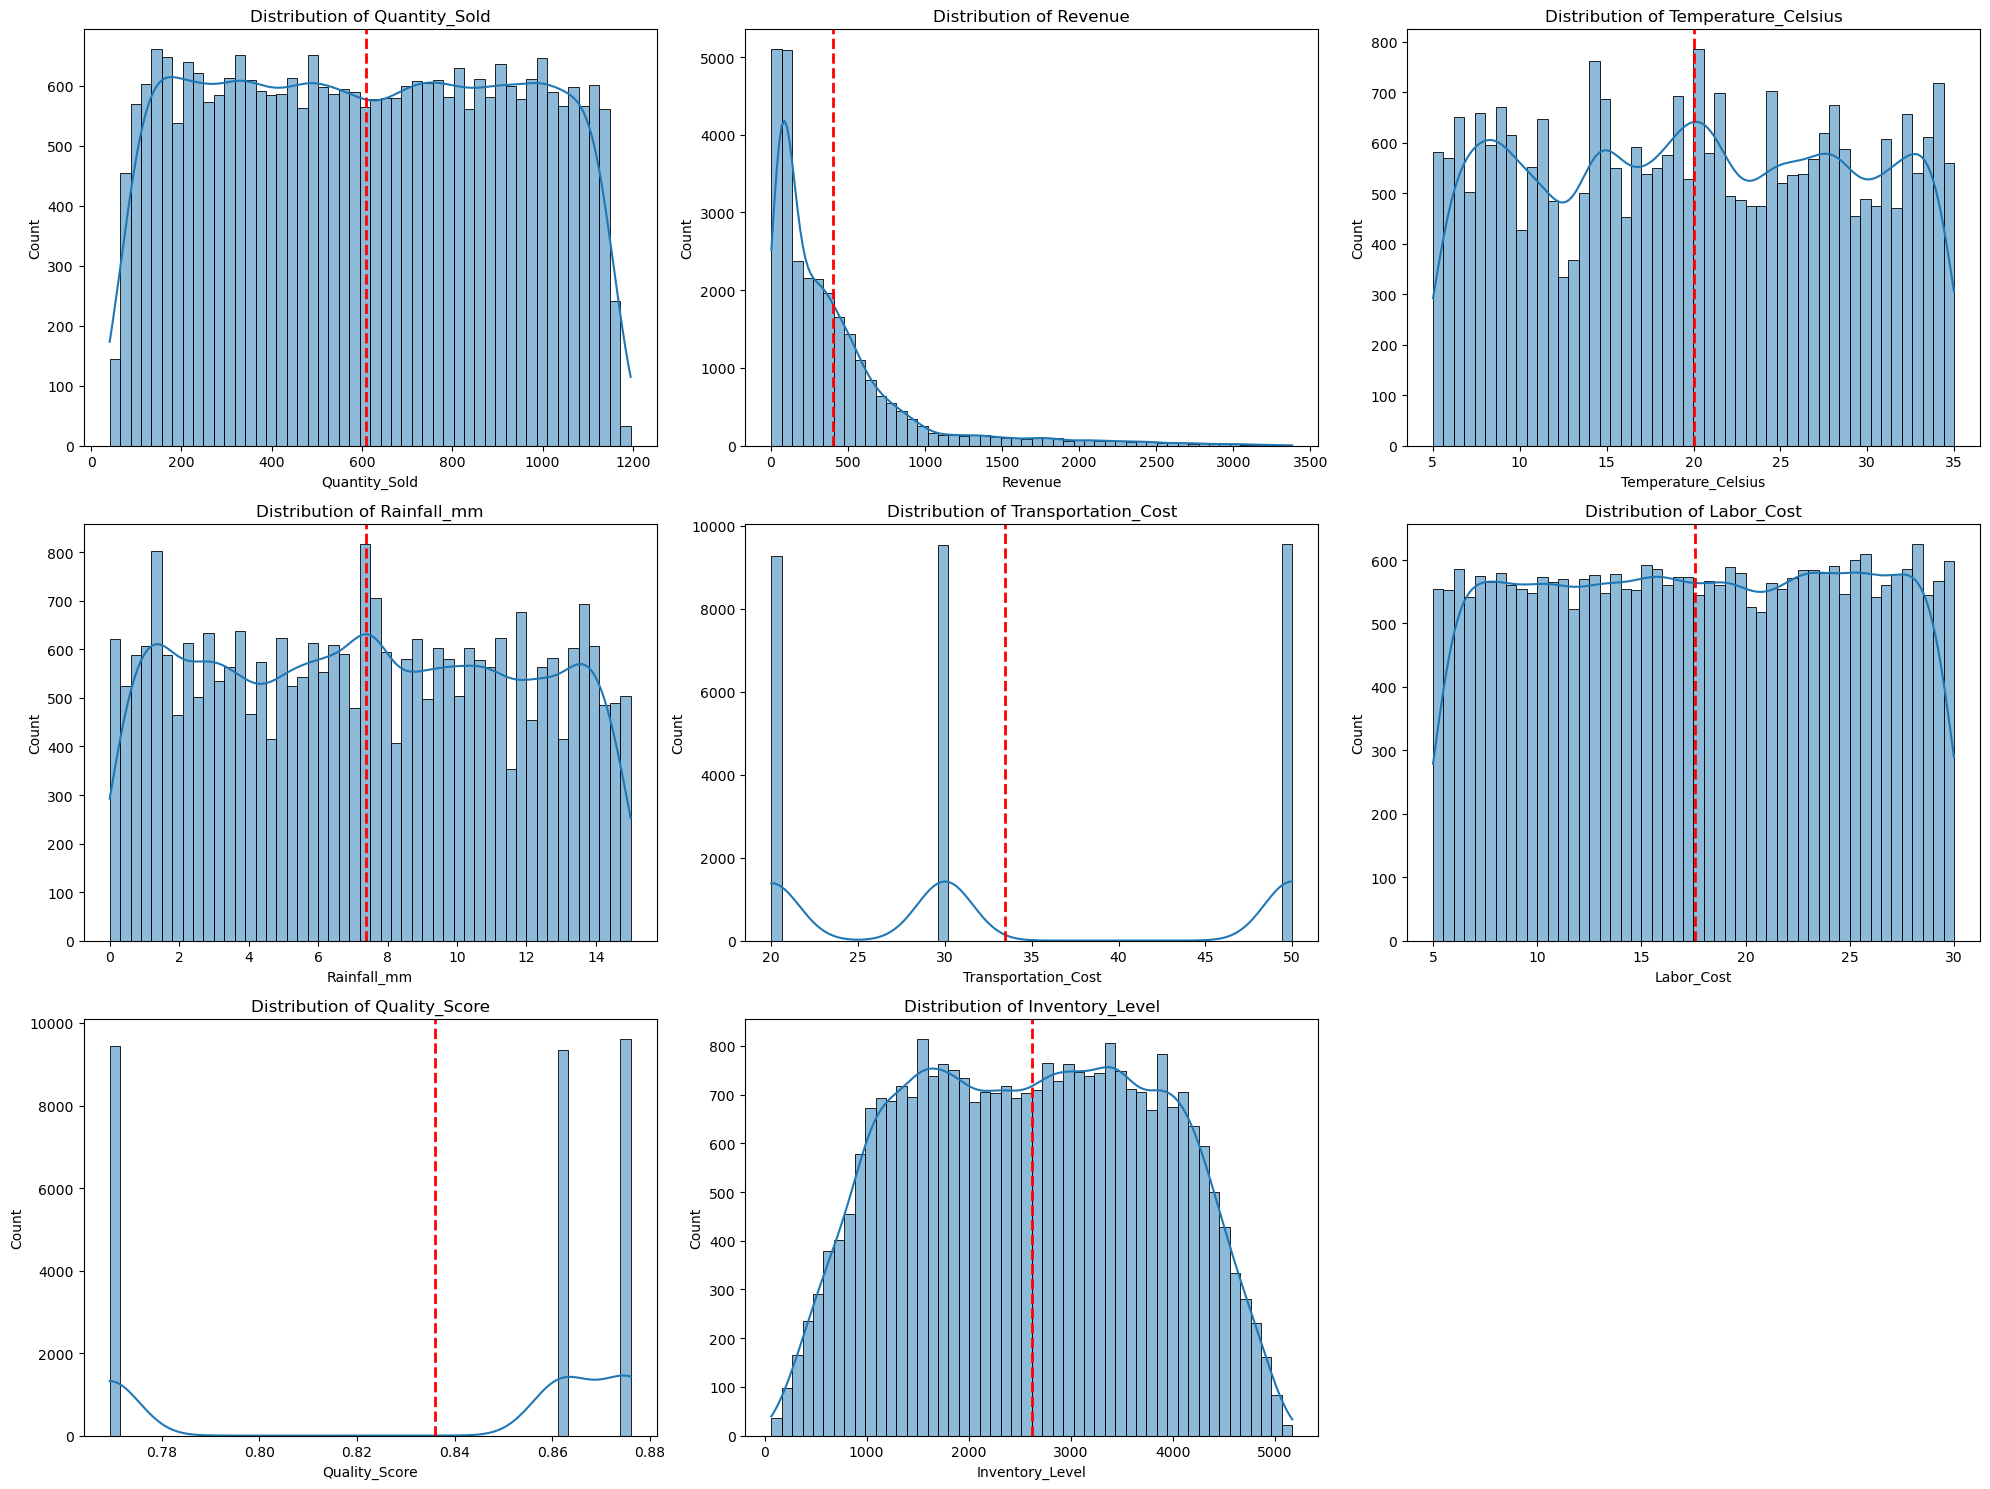

In [34]:
# Set figure size
plt.figure(figsize = (20, 15))

# List of numerical variables
numeric_vars = ['Quantity_Sold', 
                'Revenue', 
                'Temperature_Celsius', 
                'Rainfall_mm', 
                'Transportation_Cost', 
                'Labor_Cost', 
                'Quality_Score', 
                'Inventory_Level']
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], bins = 50, kde = True)
    plt.axvline(df[var].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)  # Mean line
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

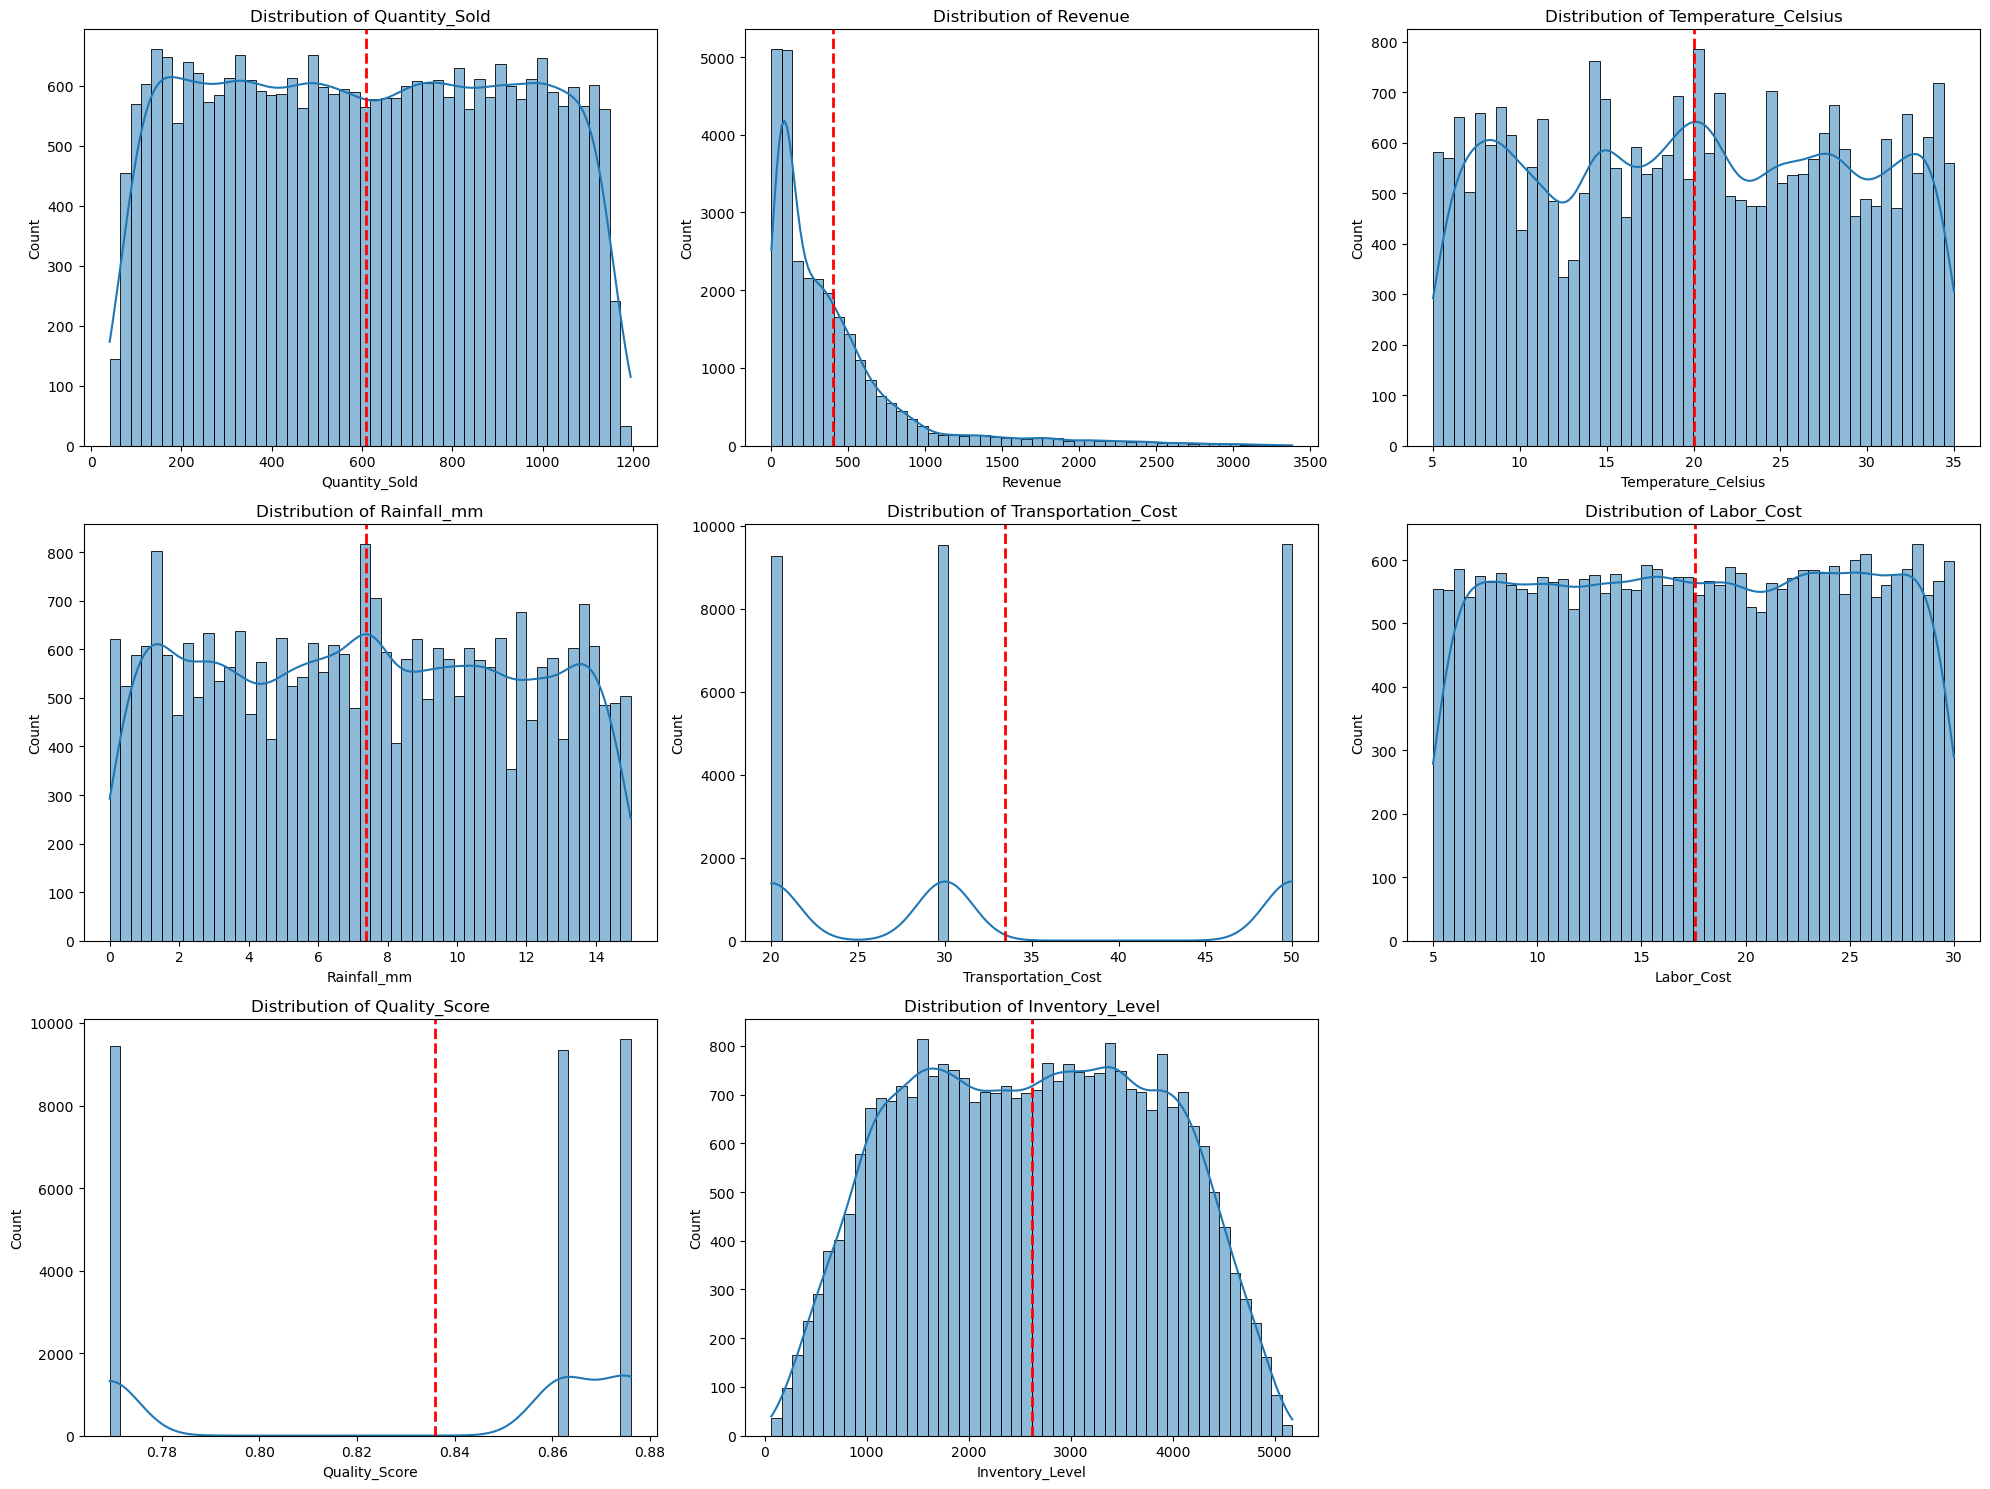

In [35]:
# This is the same plot with the above subplot. I just created a folder for the output
# Create a folder for the output
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define folder path for saving images
output_folder = "univariate_analysis_outputs"

# Create folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List of numerical variables
numeric_vars = ['Quantity_Sold', 
                'Revenue', 
                'Temperature_Celsius', 
                'Rainfall_mm', 
                'Transportation_Cost', 
                'Labor_Cost', 
                'Quality_Score', 
                'Inventory_Level']

# Set figure size
plt.figure(figsize=(20, 15))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    
    # Histogram with KDE
    sns.histplot(df[var], bins=50, kde=True)
    
    # Mean line
    plt.axvline(df[var].mean(), color='red', linestyle='dashed', linewidth=2)
    
    # Title
    plt.title(f'Distribution of {var}')
    
    # Save each histogram separately
    plt.savefig(os.path.join(output_folder, f"{var}_distribution.png"))

plt.tight_layout()
plt.show()

## Interpretation of Each Distribution Plot:

**1. Quantity_Sold**

- The distribution appears uniform with no significant skew.

- The mean (red dashed line) is approximately in the center, indicating a balanced distribution.

- No extreme peaks suggest consistent sales quantities across products.

**2. Revenue**

- The distribution is highly right-skewed (positive skew).

- A large number of observations have low revenue, but a few data points show very high revenue values.

- Possible outliers exist in the higher range, requiring further investigation.

**3. Temperature_Celsius**

- Appears normally distributed with a slight central peak.

- The mean aligns with the highest frequency range.

- No extreme outliers observed.

**4. Rainfall_mm**

- The distribution is approximately uniform but shows slight central concentration.

- No strong skewness, meaning rainfall varies consistently across observations.

- The mean lies close to the highest density, indicating that most values are clustered around the middle range.

**5. Transportation_Cost**

- Shows bimodal distribution (two peaks), suggesting two different pricing patterns.

- The peaks at low and high values indicate that transportation costs might depend on specific factors such as distance or product type.

- Needs further segmentation analysis to understand the reasons behind the two peaks.

**6. Labor_Cost**

- Appears uniformly distributed, with no strong skewness.

- The mean is centered, showing a stable distribution of labor costs.

- No visible outliers.

**7. Quality_Score**

- The distribution is left-skewed, meaning most products have high-quality scores.

- The presence of two peaks suggests that some products consistently score lower, while the majority have a high rating.

- Requires further analysis to determine why some products have significantly lower scores.

**8. Inventory_Level**

- The distribution is approximately normal, with a slight skew towards lower values.

- Most inventory levels are concentrated around the mean, but a few lower values might indicate stock shortages or supply chain issues.

**Summary of Key Observations:**

- ✅ Revenue is highly skewed, indicating potential outliers or a business model where high-revenue transactions are rare.
- ✅ Transportation Cost & Quality Score show bimodal distributions, suggesting distinct clusters in pricing and product quality.
- ✅ Most other features appear uniform or normally distributed, meaning they do not require immediate transformation.

# A distribution is right-skewed (positively skewed) when:

- ✅ The right tail (higher values) is longer than the left tail (lower values).
- ✅ Most of the data points are concentrated on the left side, with a few extreme values on the right.
- ✅ The mean is greater than the median because the extreme high values pull the mean to the right.
- ✅ The mode (most frequent value) is less than the median, and the median is less than the mean:

**A distribution is left skewed when the above opposit conditions happened**

## Univariate Analysis: Categorical Variable

In [39]:
df.describe(include = 'object')

Date       Product Location    Customer
count        28388         28388    28388       28388
unique        2001             5        3           3
top     2017-08-26  Strawberries  Field A  Customer A
freq            29          5804     9561        9608

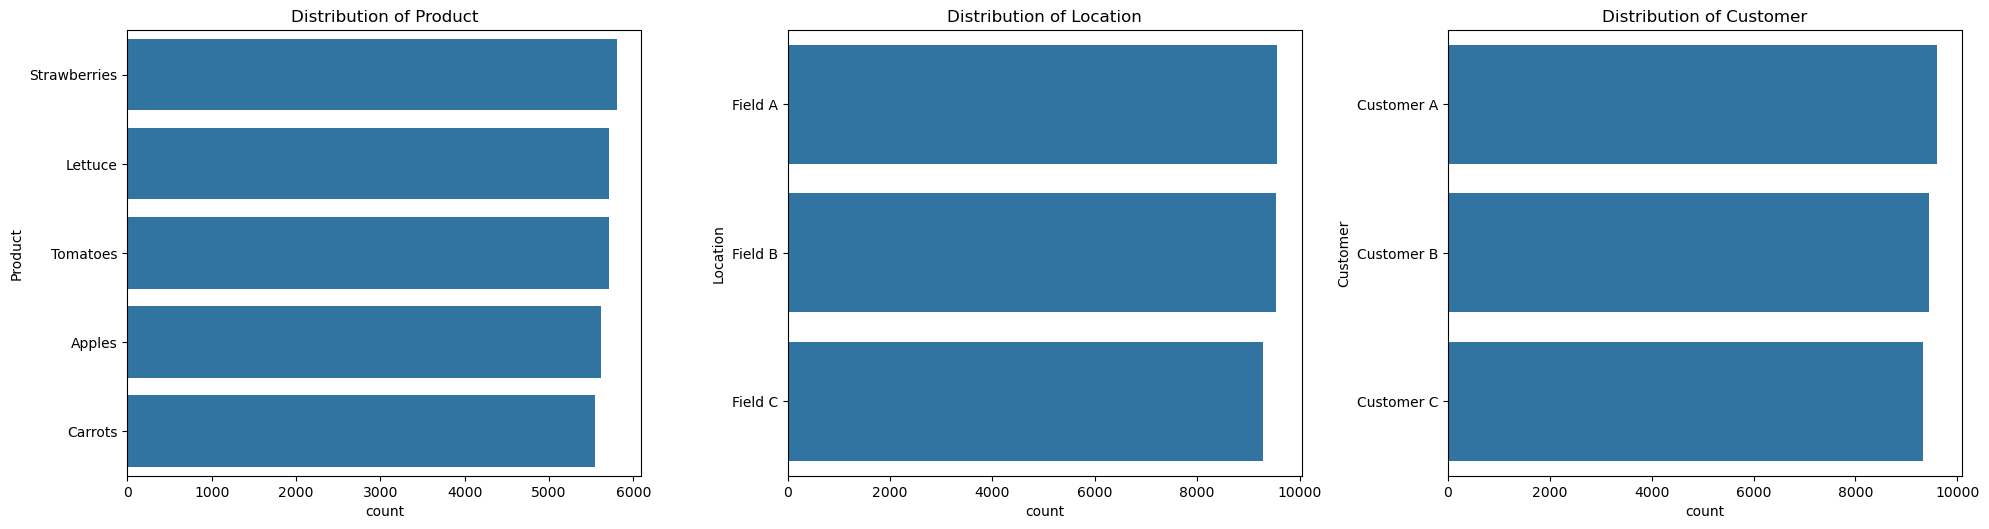

In [41]:
# Set figure size 
plt.figure(figsize = (20,10))

categorical_vars = ['Product', 'Location', 'Customer']
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2,3, i)
    sns.countplot(data = df, y = var, order = df[var].value_counts().index)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()   

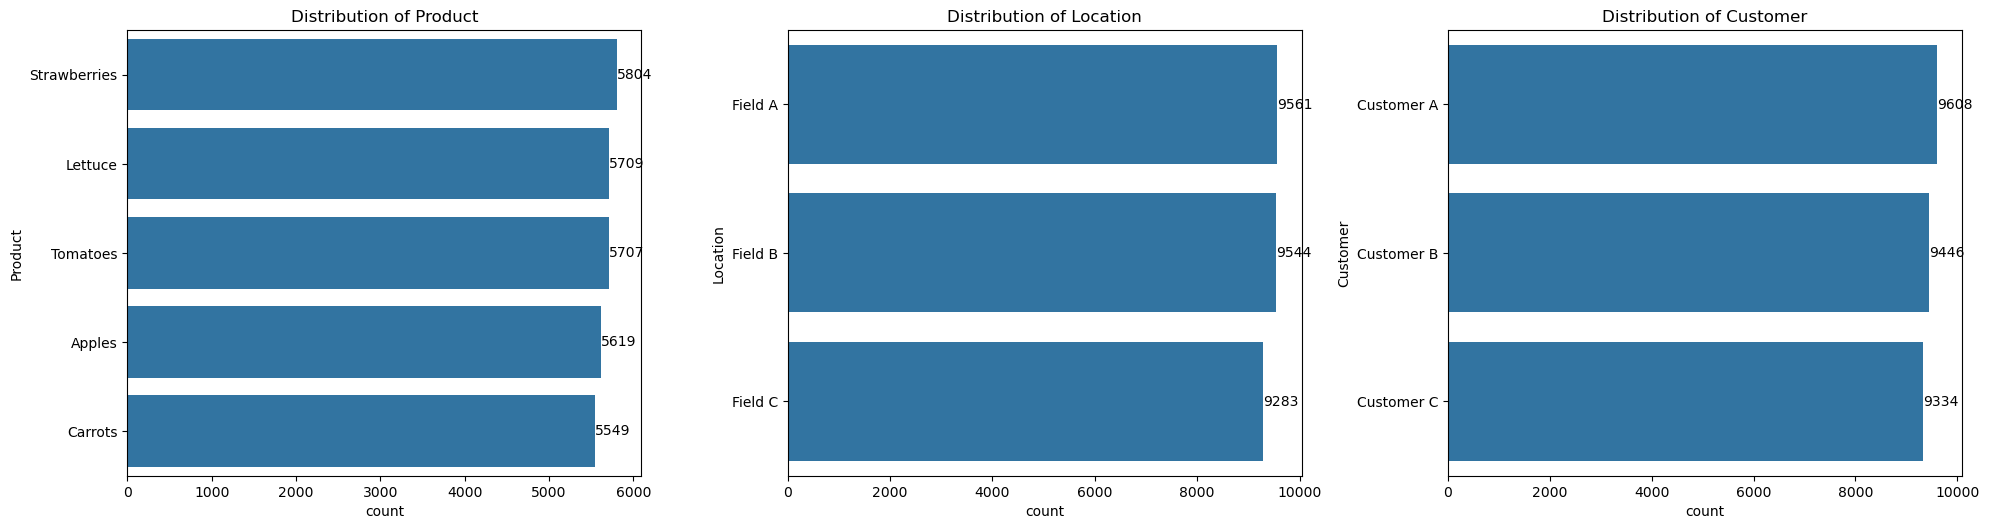

In [41]:
# 
# Set figure size 
plt.figure(figsize=(20, 10))

categorical_vars = ['Product', 'Location', 'Customer']
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    ax = sns.countplot(data=df, y=var, order=df[var].value_counts().index)
    
    for p in ax.containers:
        ax.bar_label(p)  
    
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

We will be looking at pairs of variables, by lokking at:
- Pairs of numerical variables
- Pairs of numerical and categirical variables 
- Pairs of categorical variables

  **Bivariate Analysis: Numerical Variables**

**A correlation matrix, which is a common tool in correlation analysis, displays multiple bivariate correlations, but the overall analysis of that matrix is considered multivariate**

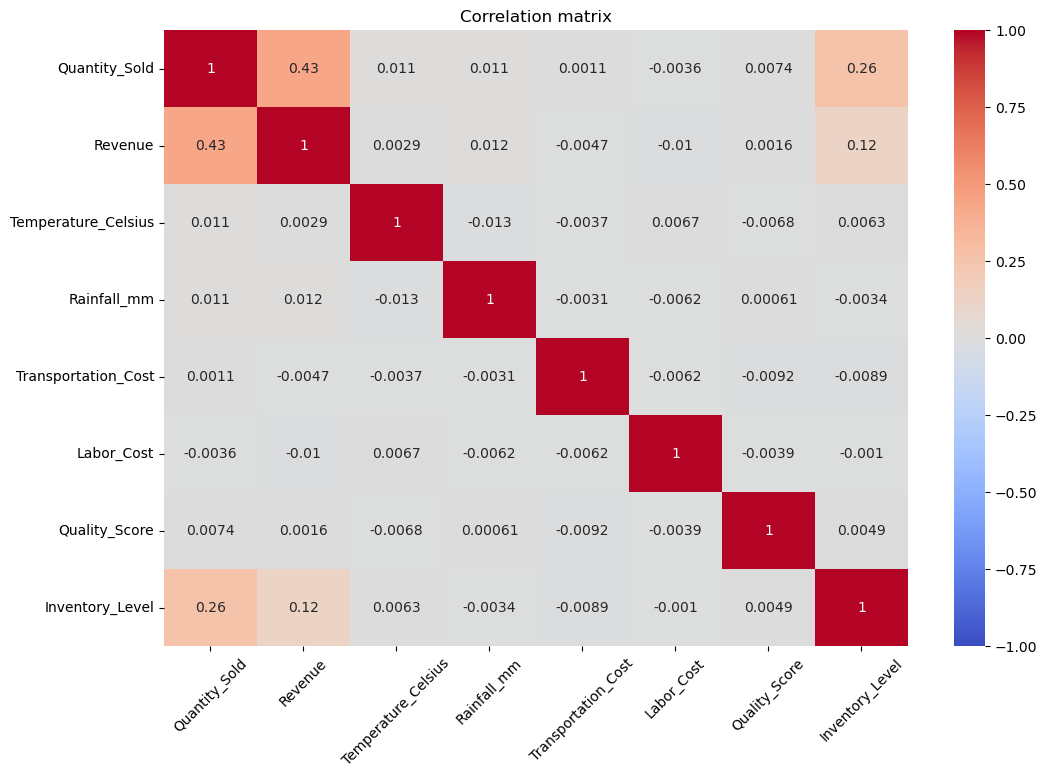

In [43]:
# Compute correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title and adjust labels
plt.title('Correlation matrix')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [44]:
correlation_matrix

Quantity_Sold   Revenue  Temperature_Celsius  \
Quantity_Sold             1.000000  0.434548             0.010994   
Revenue                   0.434548  1.000000             0.002886   
Temperature_Celsius       0.010994  0.002886             1.000000   
Rainfall_mm               0.010791  0.012071            -0.013392   
Transportation_Cost       0.001104 -0.004730            -0.003727   
Labor_Cost               -0.003623 -0.009972             0.006657   
Quality_Score             0.007376  0.001555            -0.006761   
Inventory_Level           0.261619  0.119327             0.006250   

                     Rainfall_mm  Transportation_Cost  Labor_Cost  \
Quantity_Sold           0.010791             0.001104   -0.003623   
Revenue                 0.012071            -0.004730   -0.009972   
Temperature_Celsius    -0.013392            -0.003727    0.006657   
Rainfall_mm             1.000000            -0.003087   -0.006173   
Transportation_Cost    -0.003087             1.000000   -0.006233   
Labor_Cost             -0.006173            -0.006233    1.000000   
Quality_Score           0.000609            -0.009179   -0.003897   
Inventory_Level        -0.003391            -0.008940   -0.001005   

                     Quality_Score  Inventory_Level  
Quantity_Sold             0.007376         0.261619  
Revenue                   0.001555         0.119327  
Temperature_Celsius      -0.006761         0.006250  
Rainfall_mm               0.000609        -0.003391  
Transportation_Cost      -0.009179        -0.008940  
Labor_Cost               -0.003897        -0.001005  
Quality_Score             1.000000         0.004877  
Inventory_Level           0.004877         1.000000

**Interpretation of the Correlation Matrix:**

**1. Strongest Correlations:**

- Quantity_Sold and Revenue have a moderate positive correlation (0.43), meaning an increase in the quantity sold tends to increase revenue.

- Quantity_Sold and Inventory_Level have a positive correlation (0.26), indicating that higher inventory levels are associated with higher quantities sold.

**2. Weak or No Significant Correlation:**

- Revenue and Inventory_Level have a weak positive correlation (0.12), suggesting that revenue is slightly influenced by inventory levels.

- Temperature_Celsius, Rainfall_mm, Transportation_Cost, Labor_Cost, and Quality_Score show very weak or near-zero correlations with other variables, indicating minimal relationships.

**3. Independent Variables:**

- Transportation_Cost, Labor_Cost, and Quality_Score have little to no correlation with other variables, meaning they likely do not strongly influence sales, revenue, or inventory levels.

**Business Implications:**
- The moderate correlation between Quantity_Sold and Revenue suggests that strategies to boost sales will likely improve revenue.
- Inventory management plays a role in sales volume but has a limited direct impact on revenue.
- Environmental factors like temperature and rainfall have little to no impact on the business metrics analyzed.

## Bivariate Analysis: Numerical and Categirical Variables

We begin by analysisng "Product" against: 
- Revenue
- Quantity_Sold
- Quality_Score

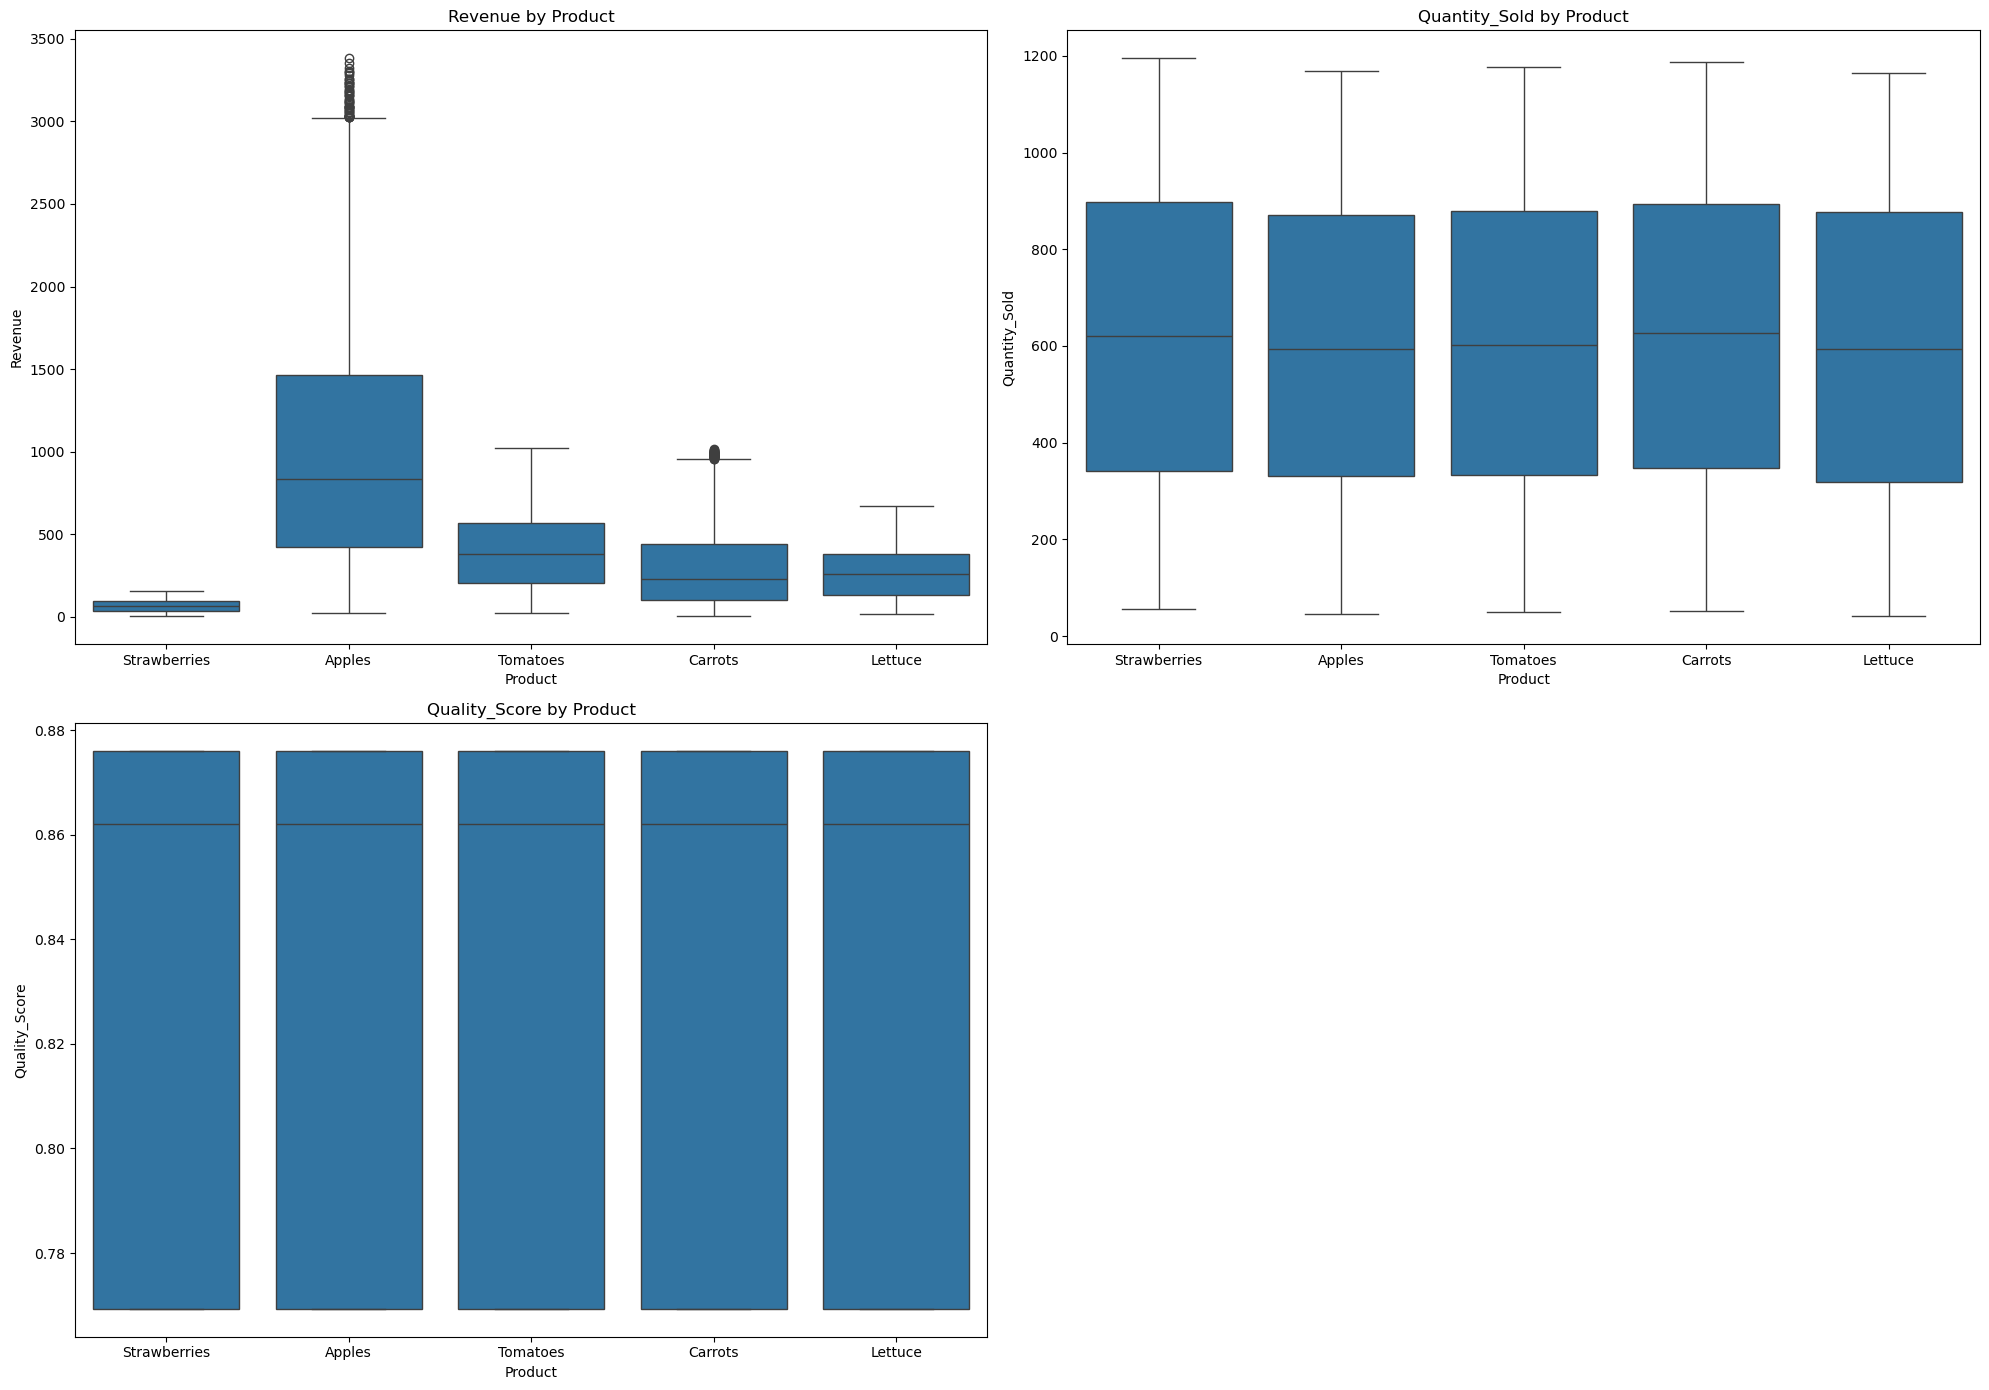

In [47]:
plt.figure(figsize = (20,14))

key_numeric_vars = ['Revenue', 'Quantity_Sold', 'Quality_Score']

for i, var in enumerate(key_numeric_vars, 1):
    plt.subplot(2,2, i)
    sns.boxplot(data = df, x = 'Product', y = var)
    plt.title(f'{var} by Product')
plt.tight_layout()
plt.show()

## Observation 
- There is a clear relationship between Product and Revenue
- No clear relationship between Product and Quantity_Sold
- No clear relationship between Product and Quality score

## We will be analysing 'Location' against key numeric variable:

- Revenue
- Quantity_Sold
- Quality_Score

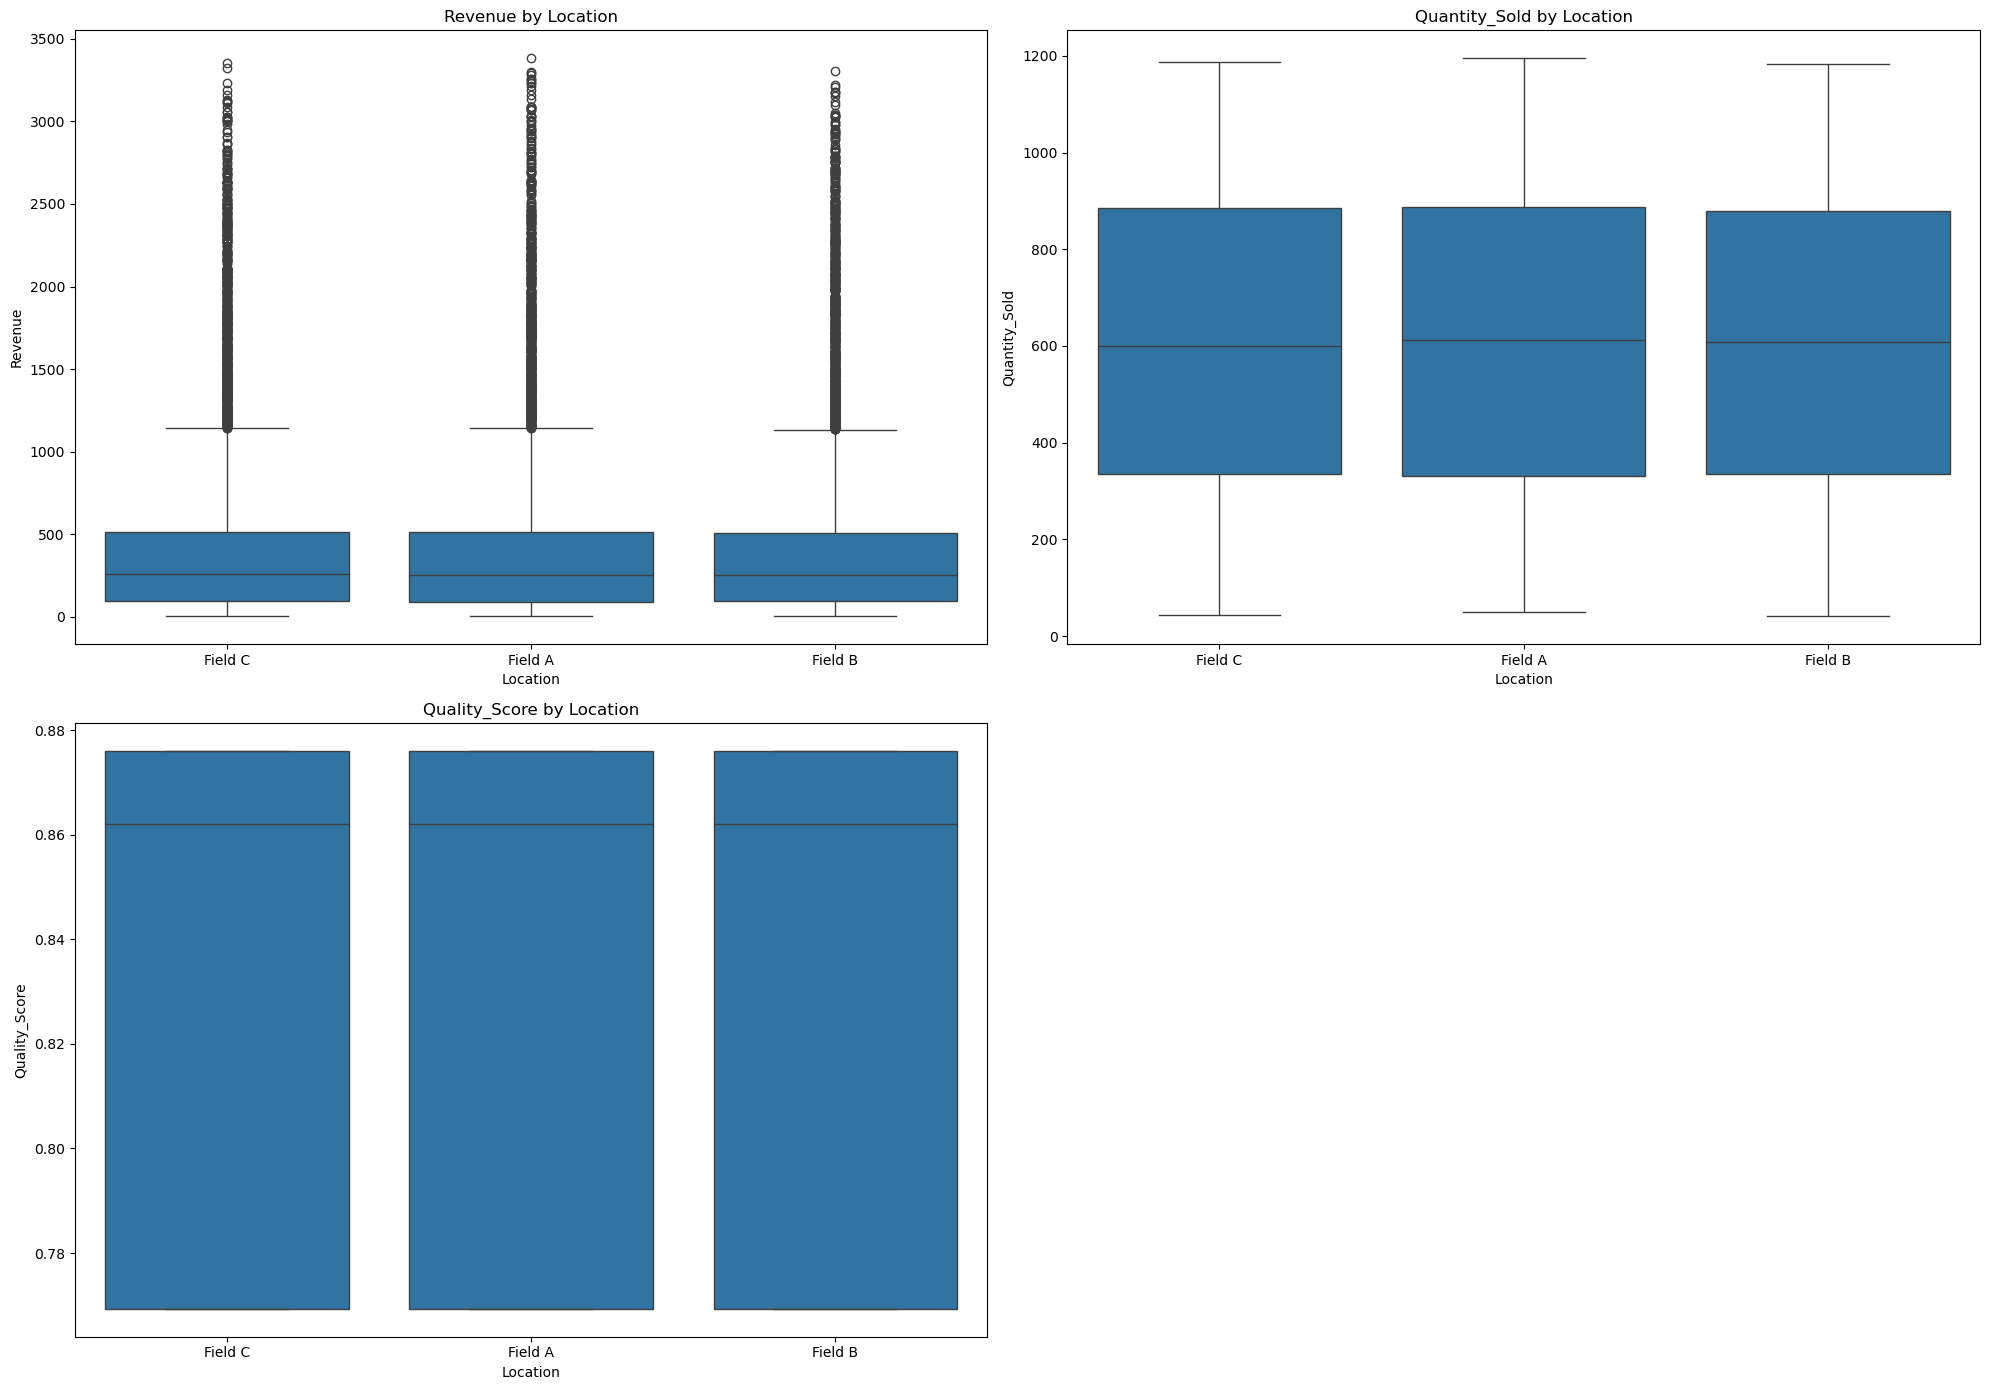

In [50]:
plt.figure(figsize = (20,14))

key_numeric_vars = ['Revenue', 'Quantity_Sold', 'Quality_Score']

for i, var in enumerate(key_numeric_vars, 1):
    plt.subplot(2,2, i)
    sns.boxplot(data = df, x = 'Location', y = var)
    plt.title(f'{var} by Location')
plt.tight_layout()
plt.show()

# Observation 
- Revenue, quantity sold and quality score did have a sigficant change across the 3 locations

## We will be visualising "Customer" against key numeric variable:
- Revenue
- Quantity_Sold
- Quality_Score

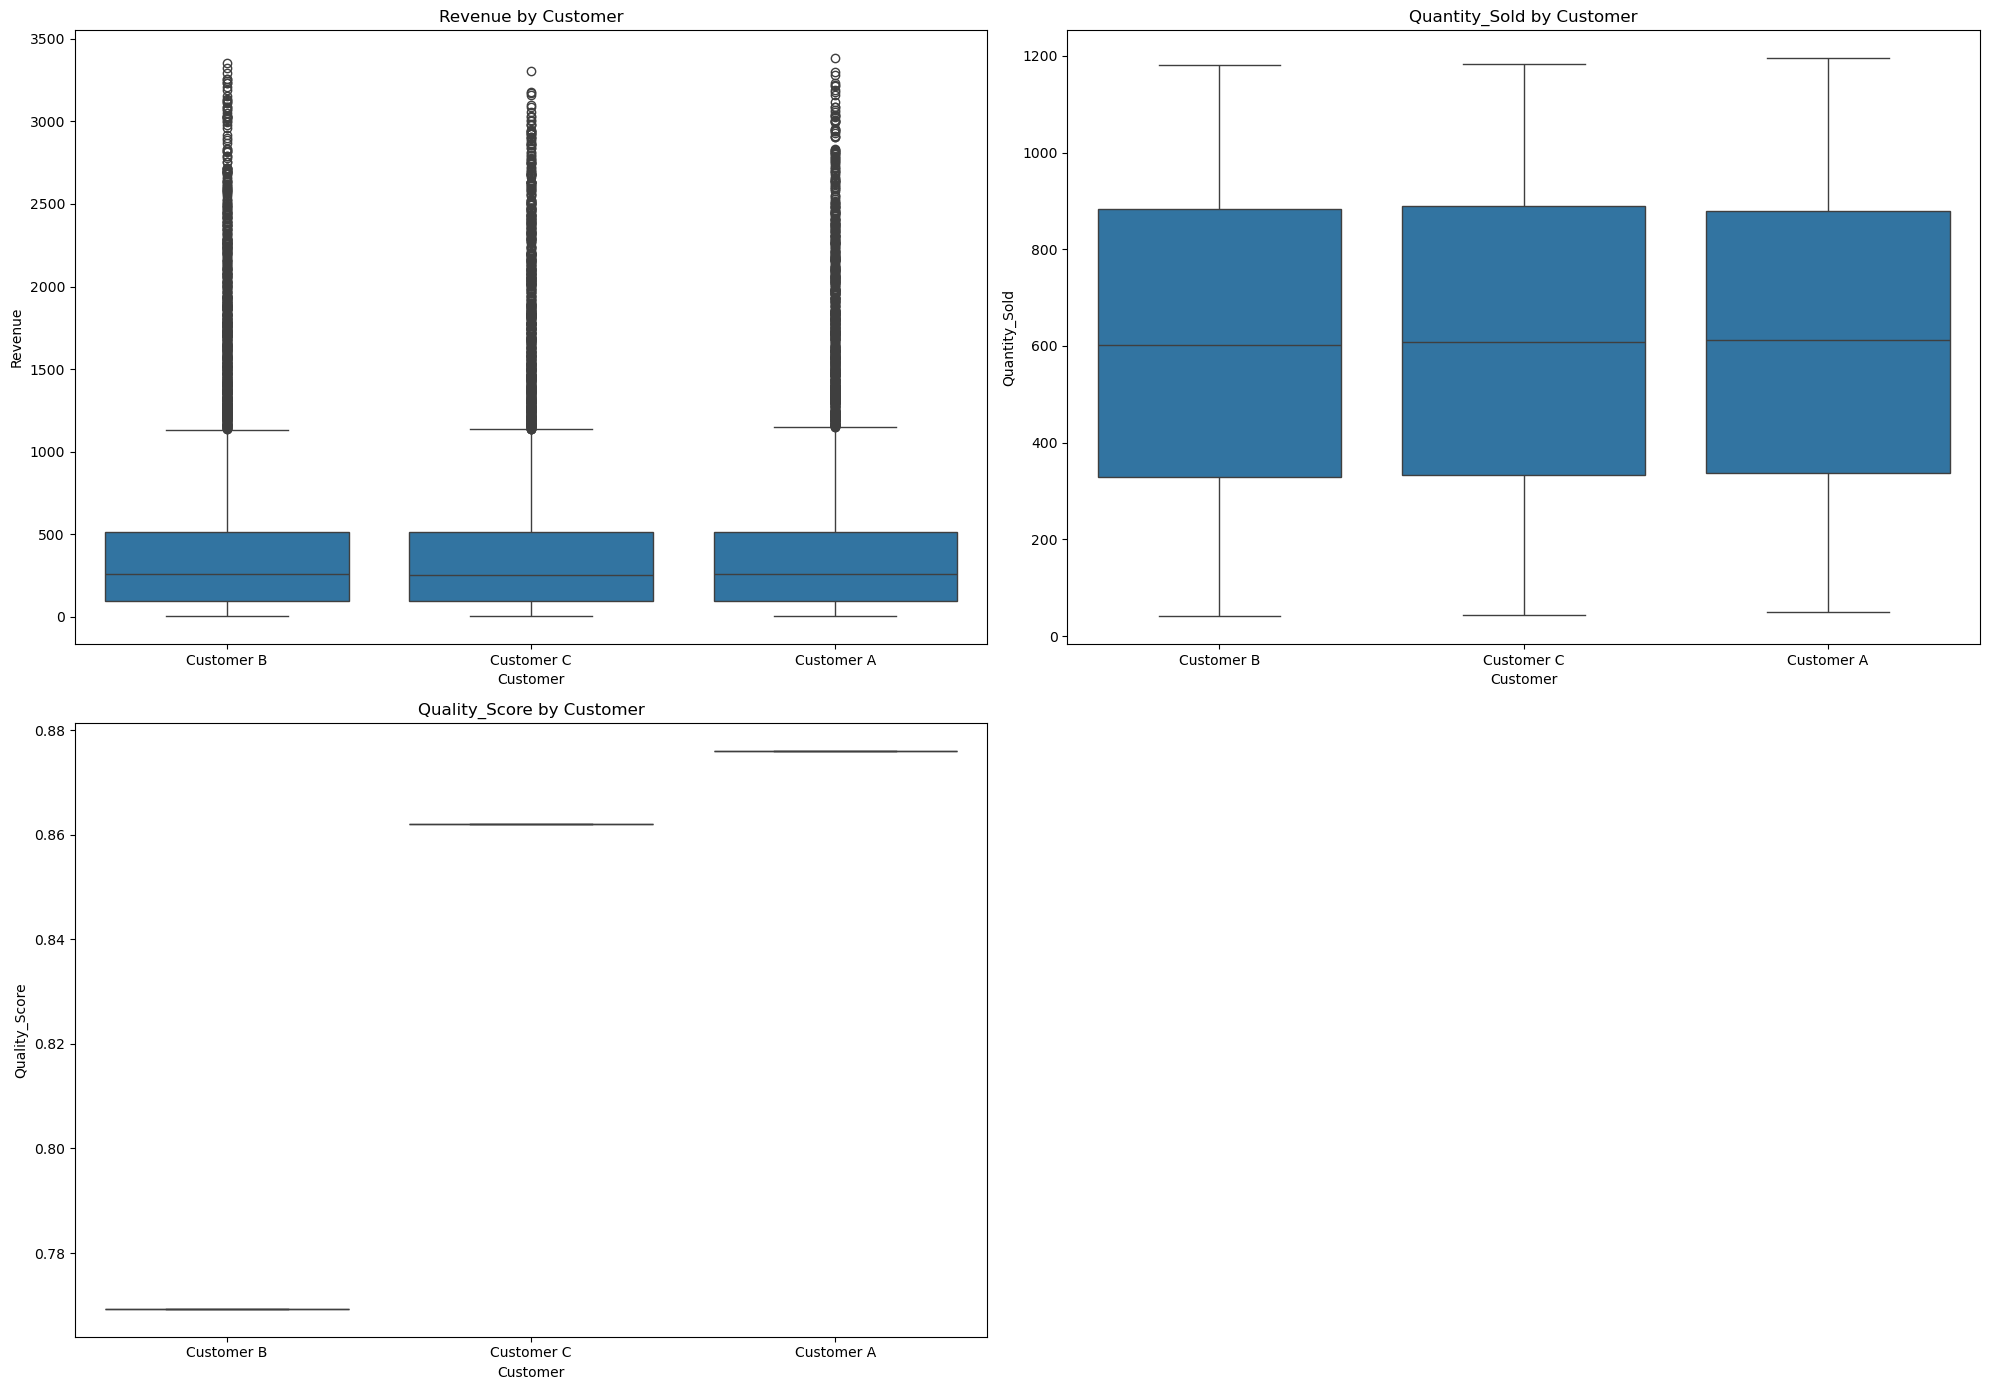

In [53]:
plt.figure(figsize = (20,14))

key_numeric_vars = ['Revenue', 'Quantity_Sold', 'Quality_Score']

for i, var in enumerate(key_numeric_vars, 1):
    plt.subplot(2,2, i)
    sns.boxplot(data = df, x = 'Customer', y = var)
    plt.title(f'{var} by Customer')
plt.tight_layout()
plt.show()

## Observations 

- There is a significant difference between the quality of the product each category of the customer bought
- Customer A bought products with the hightest quality followed by customer C, while the least is customer B

# Next, we visualise:
- Total 'Quantity_Sold' per Product,
- Total 'Revenue' per Product, 
- Average 'Quality_Score' per product

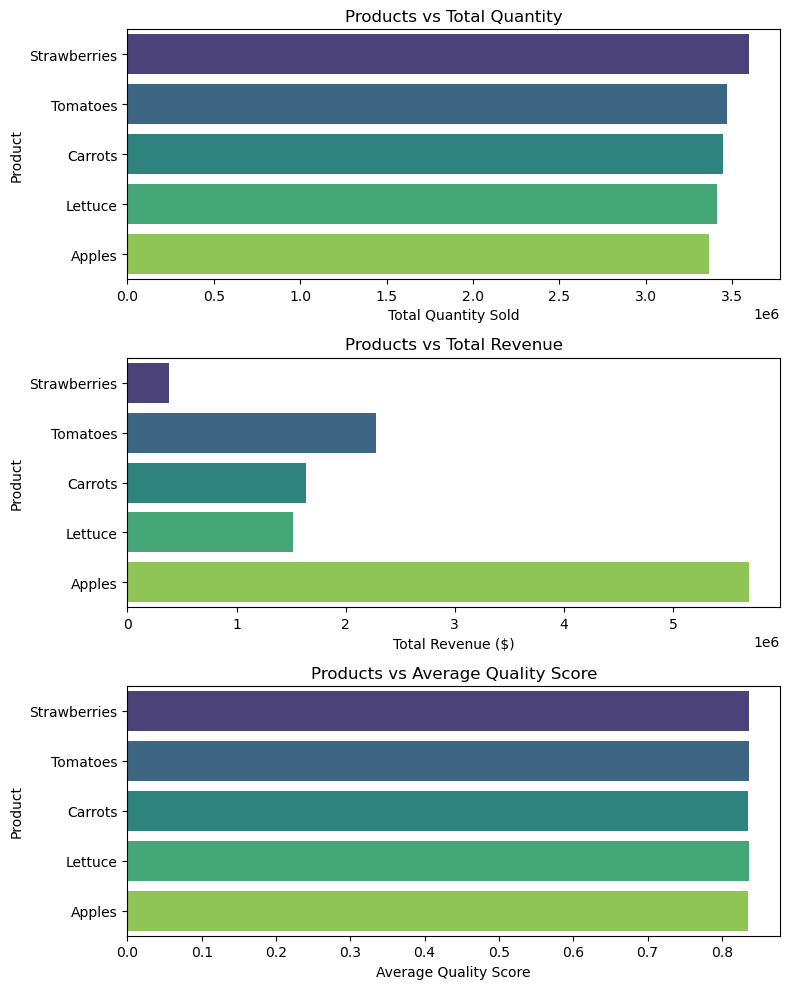

In [47]:
# Grouping the dataset by 'Product' and aggregating key metrics
product_data = df.groupby('Product').agg({'Quantity_Sold': 'sum',  # Sum of quantity sold per product
                                          'Revenue': 'sum',        # Sum of revenue per product
                                          'Quality_Score': 'mean'} # Average quality score per product
                                         ).reset_index()           # Reset index to make 'Product' a column

# Sorting the product data based on total quantity sold in descending order
product_data = product_data.sort_values(by='Quantity_Sold', ascending=False)

# Creating a figure with 3 subplots arranged in a single column
fx, ax = plt.subplots(3,1, figsize=(8,10))  

# 1st subplot: Bar plot of products vs total quantity sold
sns.barplot(data=product_data, x='Quantity_Sold', y='Product', ax=ax[0], palette='viridis')
ax[0].set_title('Products vs Total Quantity')  # Title for the first plot
ax[0].set_xlabel('Total Quantity Sold')        # X-axis label
ax[0].set_ylabel('Product')                    # Y-axis label

# 2nd subplot: Bar plot of products vs total revenue
sns.barplot(data=product_data, x='Revenue', y='Product', ax=ax[1], palette='viridis')
ax[1].set_title('Products vs Total Revenue')   # Title for the second plot
ax[1].set_xlabel('Total Revenue ($)')          # X-axis label
ax[1].set_ylabel('Product')                    # Y-axis label

# 3rd subplot: Bar plot of products vs average quality score
sns.barplot(data=product_data, x='Quality_Score', y='Product', ax=ax[2], palette='viridis')
ax[2].set_title('Products vs Average Quality Score')  # Title for the third plot
ax[2].set_xlabel('Average Quality Score')            # X-axis label
ax[2].set_ylabel('Product')                          # Y-axis label

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the final visualization
plt.show()

## Next we see Total Quantity sold for each product per customer

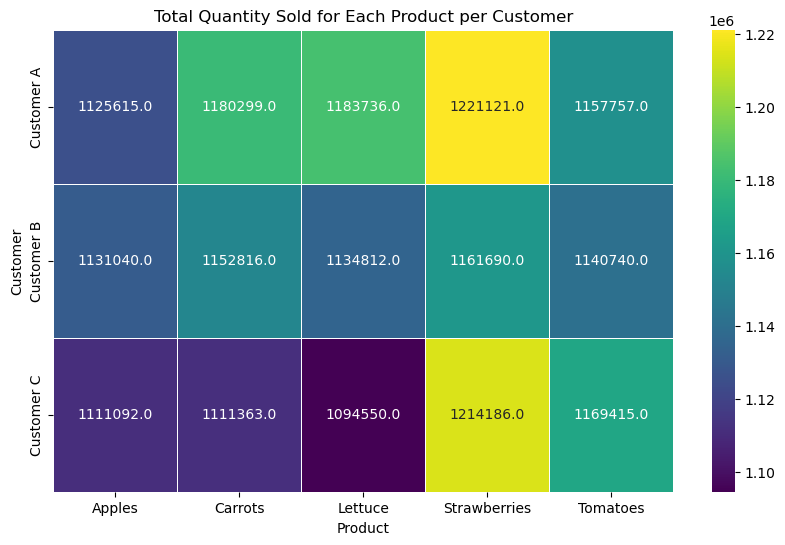

In [146]:
# Grouping the dataset by 'Customer' and 'Product' and aggregating key metrics
customer_data = df.groupby(['Customer', 'Product']).agg({'Quantity_Sold': 'sum',  # Total quantity sold per customer-product pair
                                                          'Revenue': 'sum',        # Total revenue per customer-product pair
                                                          'Quality_Score': 'mean'} # Average quality score per customer-product pair
                                                         ).reset_index()           # Reset index to make 'Customer' and 'Product' columns

# Creating a pivot table where 'Customer' is the index, 'Product' is the column, and values are 'Quantity_Sold'
customer_pivot = customer_data.pivot(index='Customer', columns='Product', values='Quantity_Sold')

# Setting figure size for better visualization
plt.figure(figsize=(10,6))

# Creating a heatmap to visualize the total quantity sold per product for each customer
sns.heatmap(customer_pivot, annot=True, cmap='viridis', fmt='.1f', linewidth=.5)  
# 'annot=True' displays the quantity values inside each cell
# 'cmap="viridis"' sets the color scheme
# 'fmt=".1f"' ensures numerical values are displayed with one decimal place
# 'linewidth=.5' adds a thin border around each cell for clarity

# Setting the title for the heatmap
plt.title('Total Quantity Sold for Each Product per Customer')

# Labeling the x-axis
plt.xlabel('Product')

# Labeling the y-axis
plt.ylabel('Customer')

# Displaying the final visualization
plt.show()

## Bivariate Analysis: Two Categorical Variables

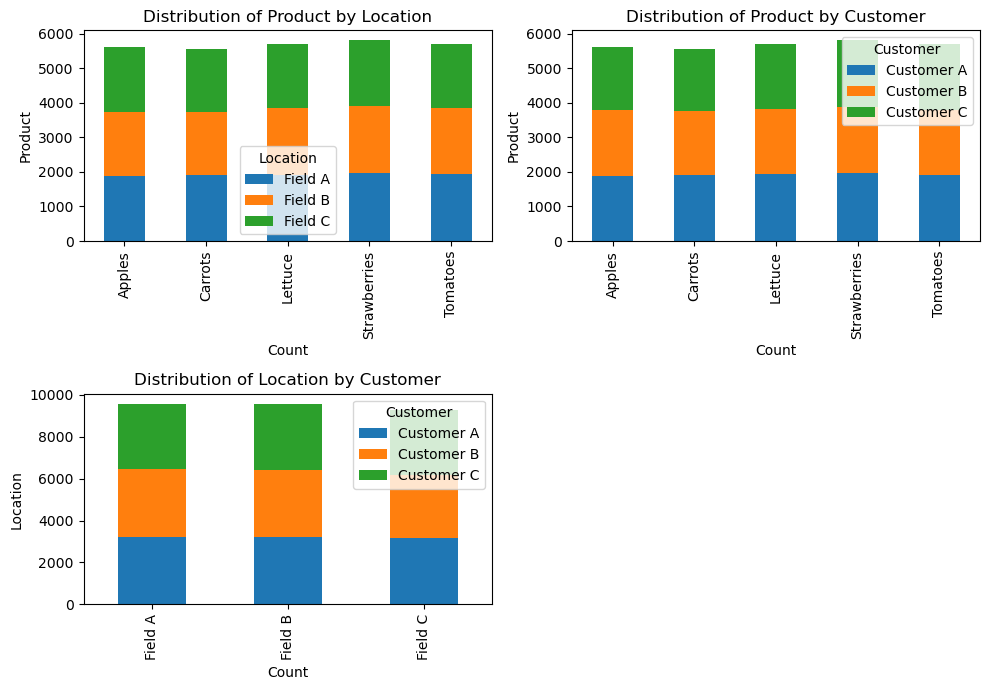

In [178]:
# Define a list of categorical variable pairs for analysis
pairs = [
    ('Product', 'Location'),   # Relationship between Product and Location
    ('Product', 'Customer'),   # Relationship between Product and Customer
    ('Location', 'Customer')   # Relationship between Location and Customer
]

# Loop through each pair of categorical variables
for i, (p1, p2) in enumerate(pairs):
    
    # Create a contingency table (cross-tabulation) between the two categorical variables
    contingency_table = pd.crosstab(df[p1], df[p2])

    # Create a subplot at position (2 rows, 2 columns, and current index i+1)
    ax = plt.subplot(2, 2, i+1)

    # Plot the contingency table as a stacked bar chart
    contingency_table.plot(kind='bar', stacked=True, figsize=(10,7), ax=ax)

    # Set the title of the plot based on the variable pair
    plt.title(f'Distribution of {p1} by {p2}')
    
    # Label the x-axis as "Count"
    plt.xlabel('Count')
    
    # Label the y-axis with the first variable (p1)
    plt.ylabel(p1)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

## Multivariate Analysis

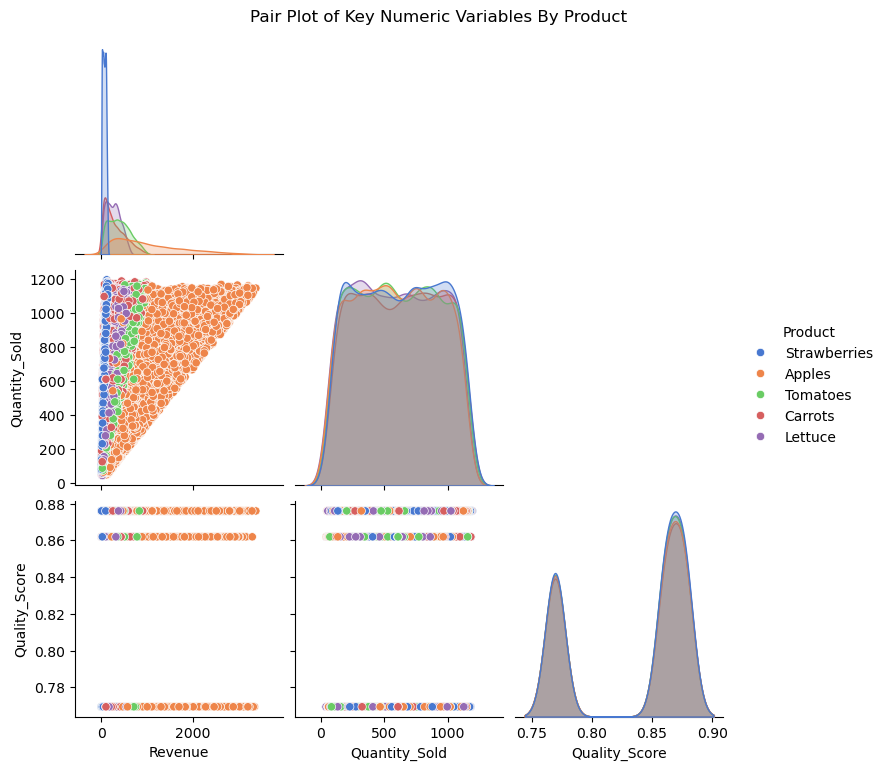

In [180]:
pair_plot = sns.pairplot(df, hue = 'Product', vars = key_numeric_vars, palette = 'muted', corner = True)
pair_plot.fig.suptitle('Pair Plot of Key Numeric Variables By Product', y = 1.02)

plt.show()

## Temporal Analysis

**How the Quantity Sold and Revenue vary daily**

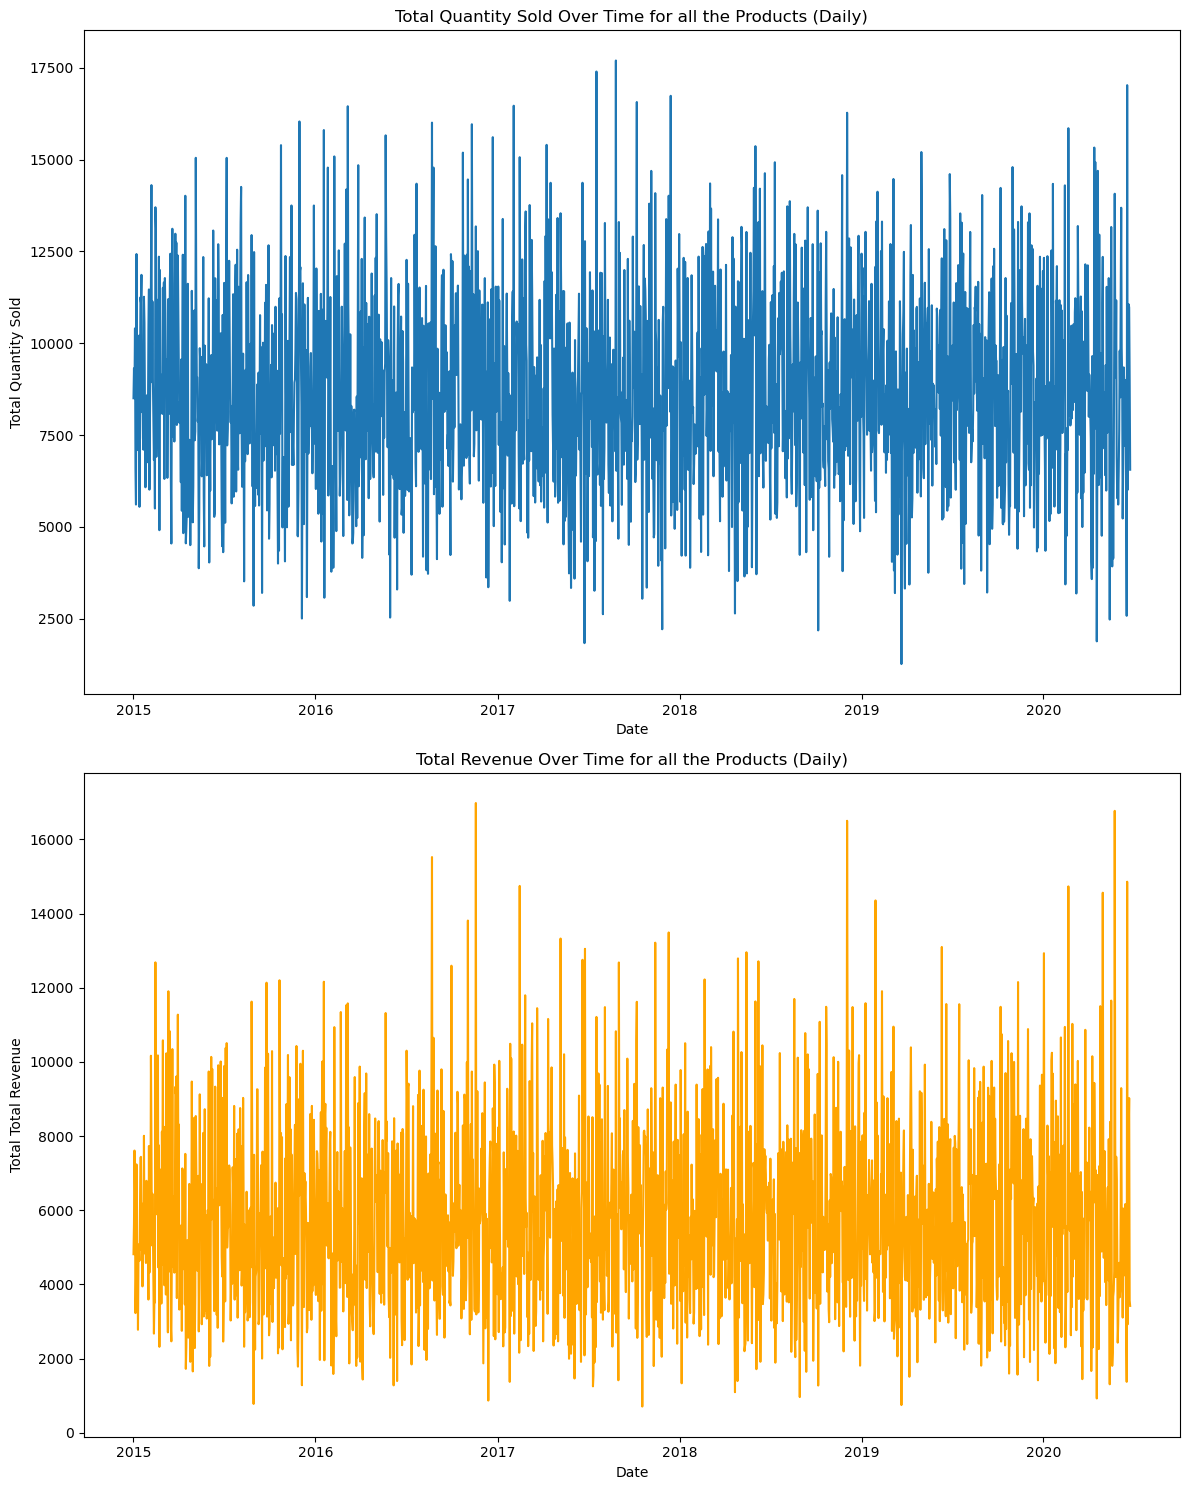

In [184]:
df['Date'] = pd.to_datetime(df['Date'])

time_based_data = df.groupby('Date').agg(
    {'Quantity_Sold': 'sum',
    'Revenue': 'sum'}).reset_index()

Fig, ax = plt.subplots(2, 1, figsize = (12, 15))

# Quantity sold Over Time
sns.lineplot(time_based_data, x = 'Date', y = 'Quantity_Sold', ax = ax[0])
ax[0].set_title('Total Quantity Sold Over Time for all the Products (Daily)')
ax[0].set_ylabel('Total Quantity Sold')

# Revenue Over Time
sns.lineplot(time_based_data, x = 'Date', y = 'Revenue', ax = ax[1], color = 'orange')
ax[1].set_title('Total Revenue Over Time for all the Products (Daily)')
ax[1].set_ylabel('Total Total Revenue')

plt.tight_layout()
plt.show()

# Make the same plot weekly 

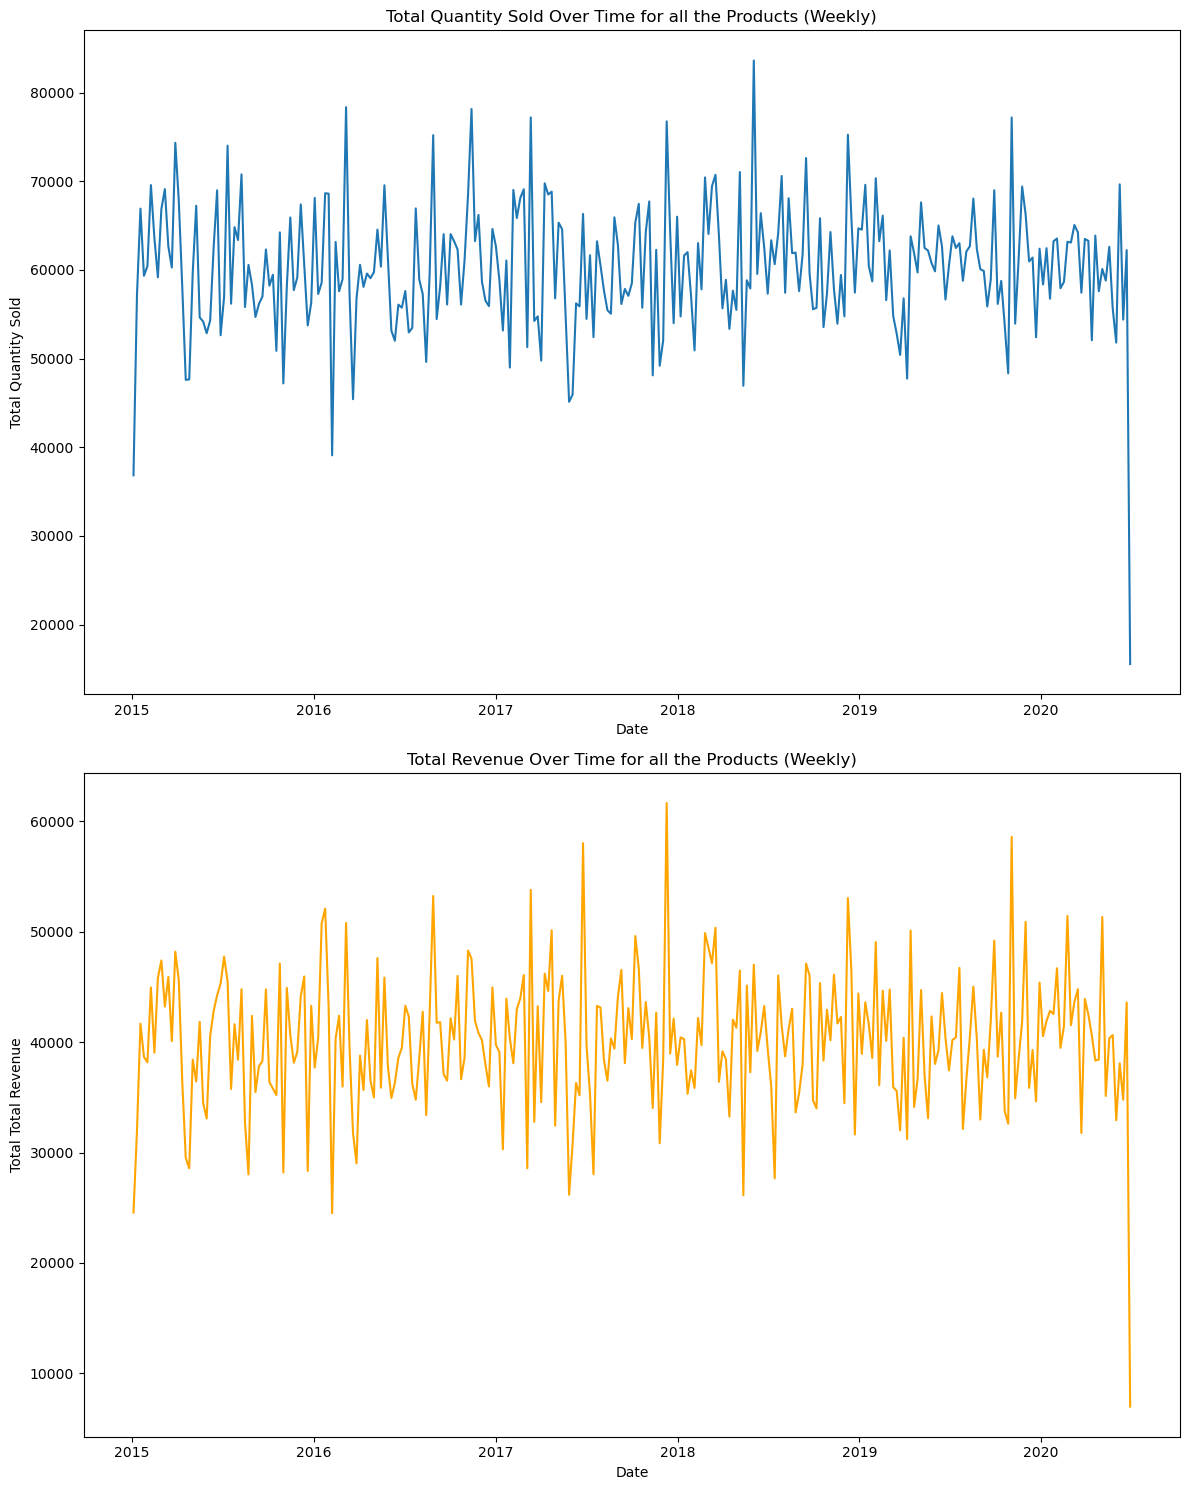

In [186]:
time_based_data = df.groupby('Date').agg(
    {'Quantity_Sold': 'sum',
    'Revenue': 'sum'}).reset_index()

time_based_data = time_based_data.set_index('Date').resample('W').sum().reset_index()

Fig, ax = plt.subplots(2, 1, figsize = (12, 15))

# Quantity sold Over Time
sns.lineplot(time_based_data, x = 'Date', y = 'Quantity_Sold', ax = ax[0])
ax[0].set_title('Total Quantity Sold Over Time for all the Products (Weekly)')
ax[0].set_ylabel('Total Quantity Sold')

# Revenue Over Time
sns.lineplot(time_based_data, x = 'Date', y = 'Revenue', ax = ax[1], color = 'orange')
ax[1].set_title('Total Revenue Over Time for all the Products (Weekly)')
ax[1].set_ylabel('Total Total Revenue')

plt.tight_layout()
plt.show()

## Make the same plot month 

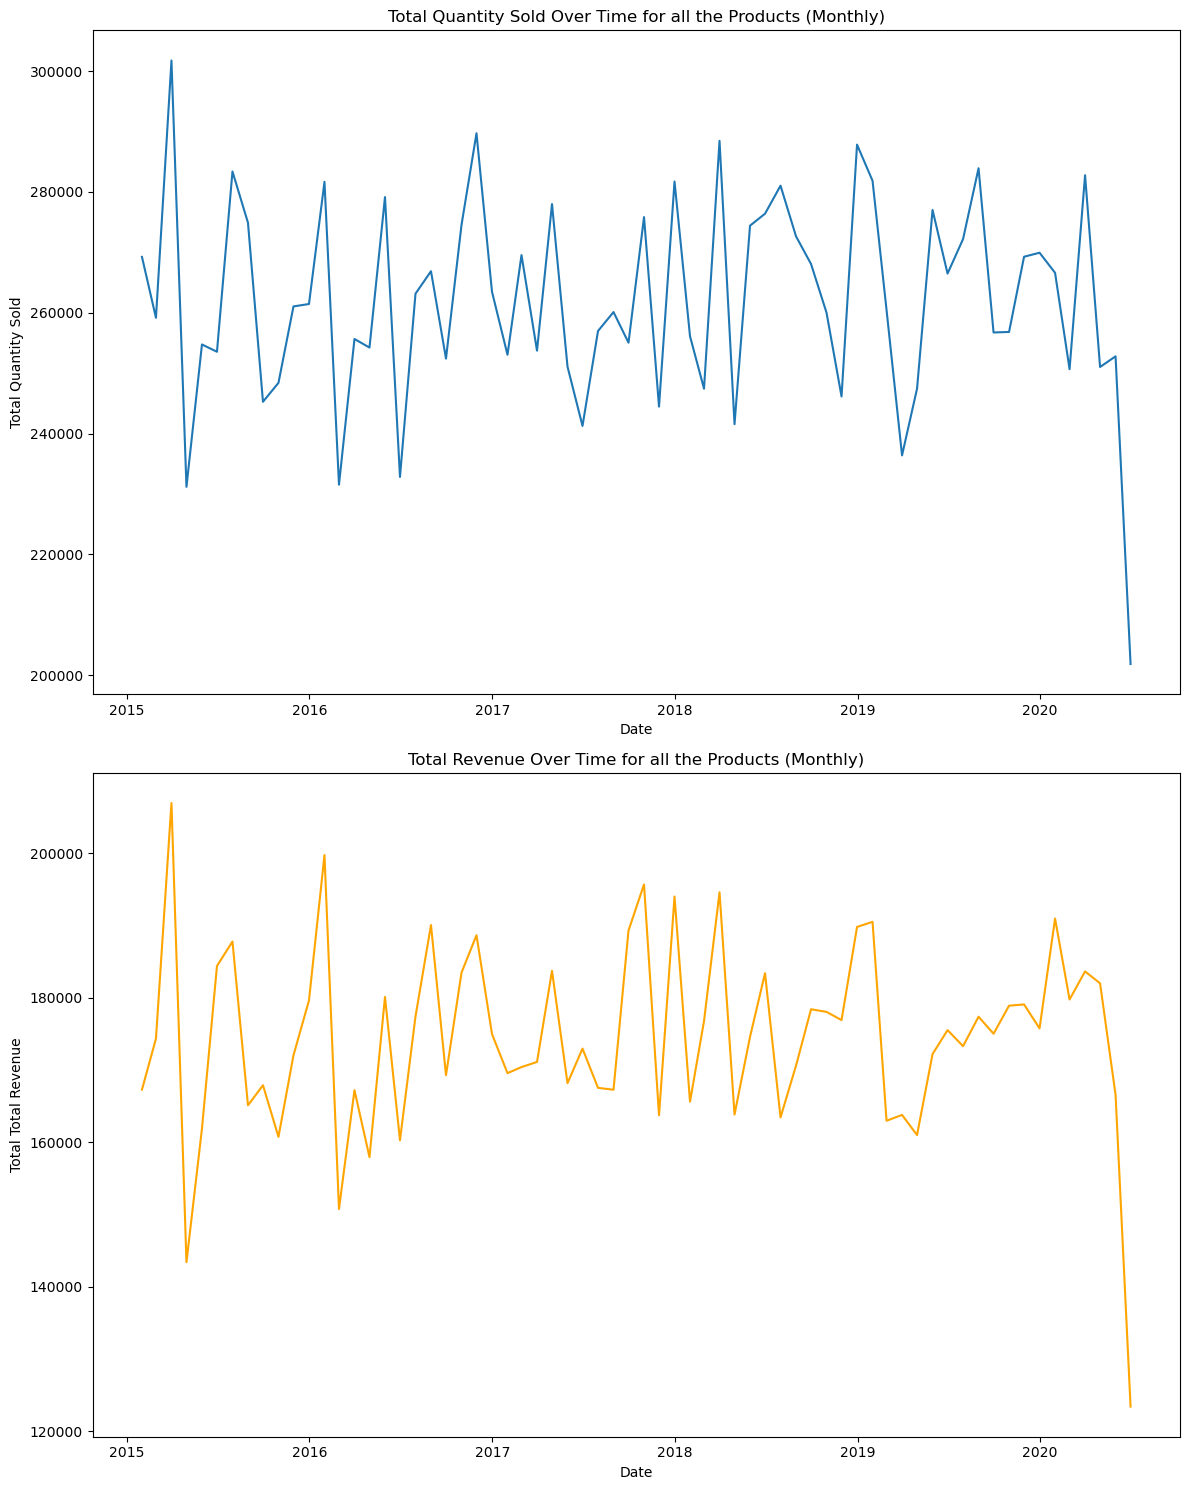

In [188]:
time_based_data = df.groupby('Date').agg(
    {'Quantity_Sold': 'sum',
    'Revenue': 'sum'}).reset_index()

time_based_data = time_based_data.set_index('Date').resample('M').sum().reset_index()

Fig, ax = plt.subplots(2, 1, figsize = (12, 15))

# Quantity sold Over Time
sns.lineplot(time_based_data, x = 'Date', y = 'Quantity_Sold', ax = ax[0])
ax[0].set_title('Total Quantity Sold Over Time for all the Products (Monthly)')
ax[0].set_ylabel('Total Quantity Sold')

# Revenue Over Time
sns.lineplot(time_based_data, x = 'Date', y = 'Revenue', ax = ax[1], color = 'orange')
ax[1].set_title('Total Revenue Over Time for all the Products (Monthly)')
ax[1].set_ylabel('Total Total Revenue')

plt.tight_layout()
plt.show()

In [190]:
# Convert 'Date' to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df = df.set_index('Date')

# Extracting time-based features
df['Quarter'] = df.index.quarter    # Extract Quarter
df['Month'] = df.index.month        # Extract Month
df['Week'] = df.index.isocalendar().week.astype(int)  # Extract Week
df['Day'] = df.index.day            # Extract Day

# Reset index to keep 'Date' as a column
df = df.reset_index()

# Display first few rows
df.head()

Date       Product  Quantity_Sold      Revenue  Temperature_Celsius  \
0 2015-01-01  Strawberries          690.0    70.298339             9.680289   
1 2015-01-01        Apples          354.0   599.863944             9.680289   
2 2015-01-01      Tomatoes          275.0   199.249505             9.680289   
3 2015-01-01        Apples         1079.0  1136.111770             9.680289   
4 2015-01-01  Strawberries         1008.0   111.653303             9.680289   

   Rainfall_mm Location  Transportation_Cost  Labor_Cost    Customer  \
0     0.077279  Field C                   20   13.771809  Customer B   
1     0.077279  Field A                   50    9.702670  Customer C   
2     0.077279  Field C                   20   22.356498  Customer C   
3     0.077279  Field A                   50   15.691418  Customer A   
4     0.077279  Field B                   30   17.473353  Customer B   

   Quality_Score  Inventory_Level  Quarter  Month  Week  Day  
0       0.769340           3608.0        1      1     1    1  
1       0.861953           3982.0        1      1     1    1  
2       0.861953           3708.0        1      1     1    1  
3       0.876056           3455.0        1      1     1    1  
4       0.769340           1504.0        1      1     1    1

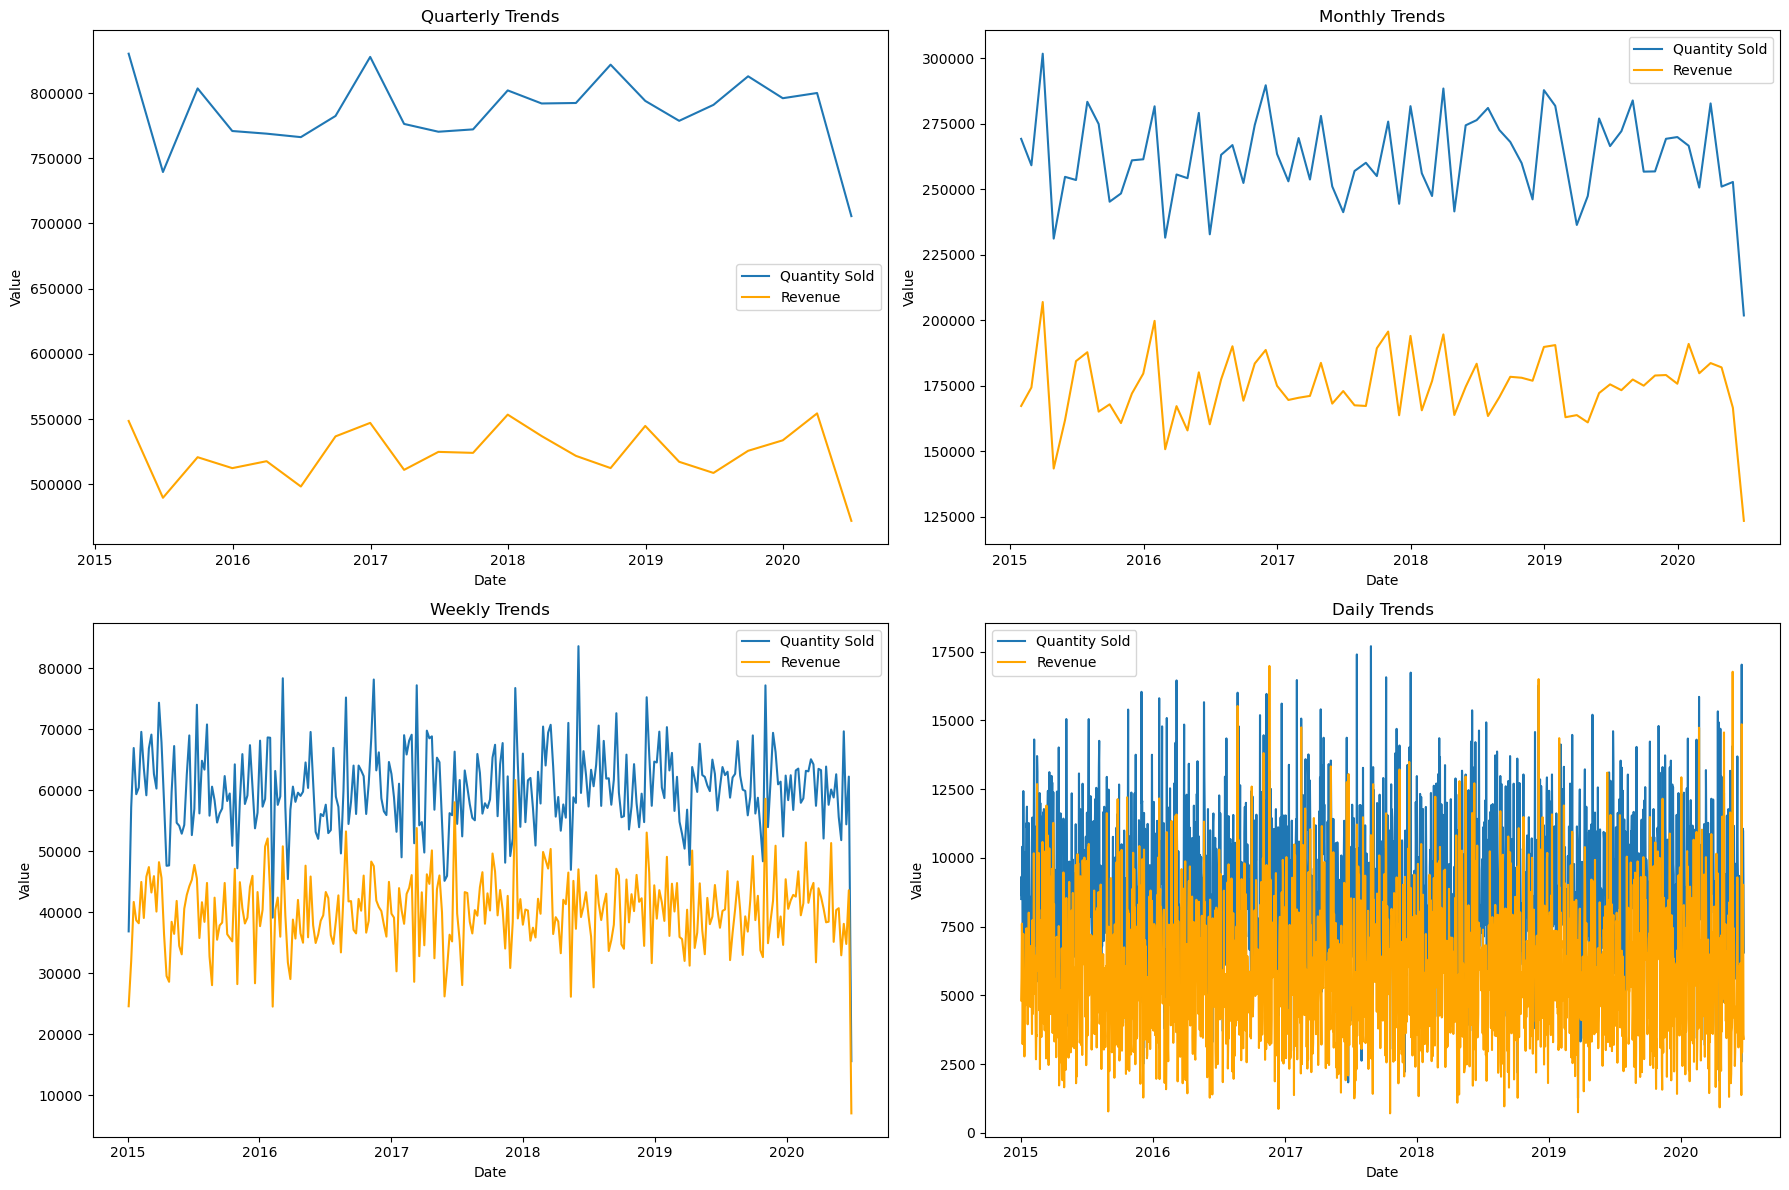

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df = df.set_index('Date')

# Create time-based aggregations
time_trends = {
    'Quarter': df.resample('Q').sum(),
    'Month': df.resample('M').sum(),
    'Week': df.resample('W').sum(),
    'Day': df.resample('D').sum()
}

# Plot trends
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Titles for each trend
titles = ['Quarterly Trends', 'Monthly Trends', 'Weekly Trends', 'Daily Trends']

# Loop through trends and plot
for ax, (key, data), title in zip(axes.flat, time_trends.items(), titles):
    sns.lineplot(data=data, x=data.index, y='Quantity_Sold', label='Quantity Sold', ax=ax)
    sns.lineplot(data=data, x=data.index, y='Revenue', label='Revenue', ax=ax, color='orange')
    ax.set_title(title)
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()

## Plot monthly quantity sold and revenue per product

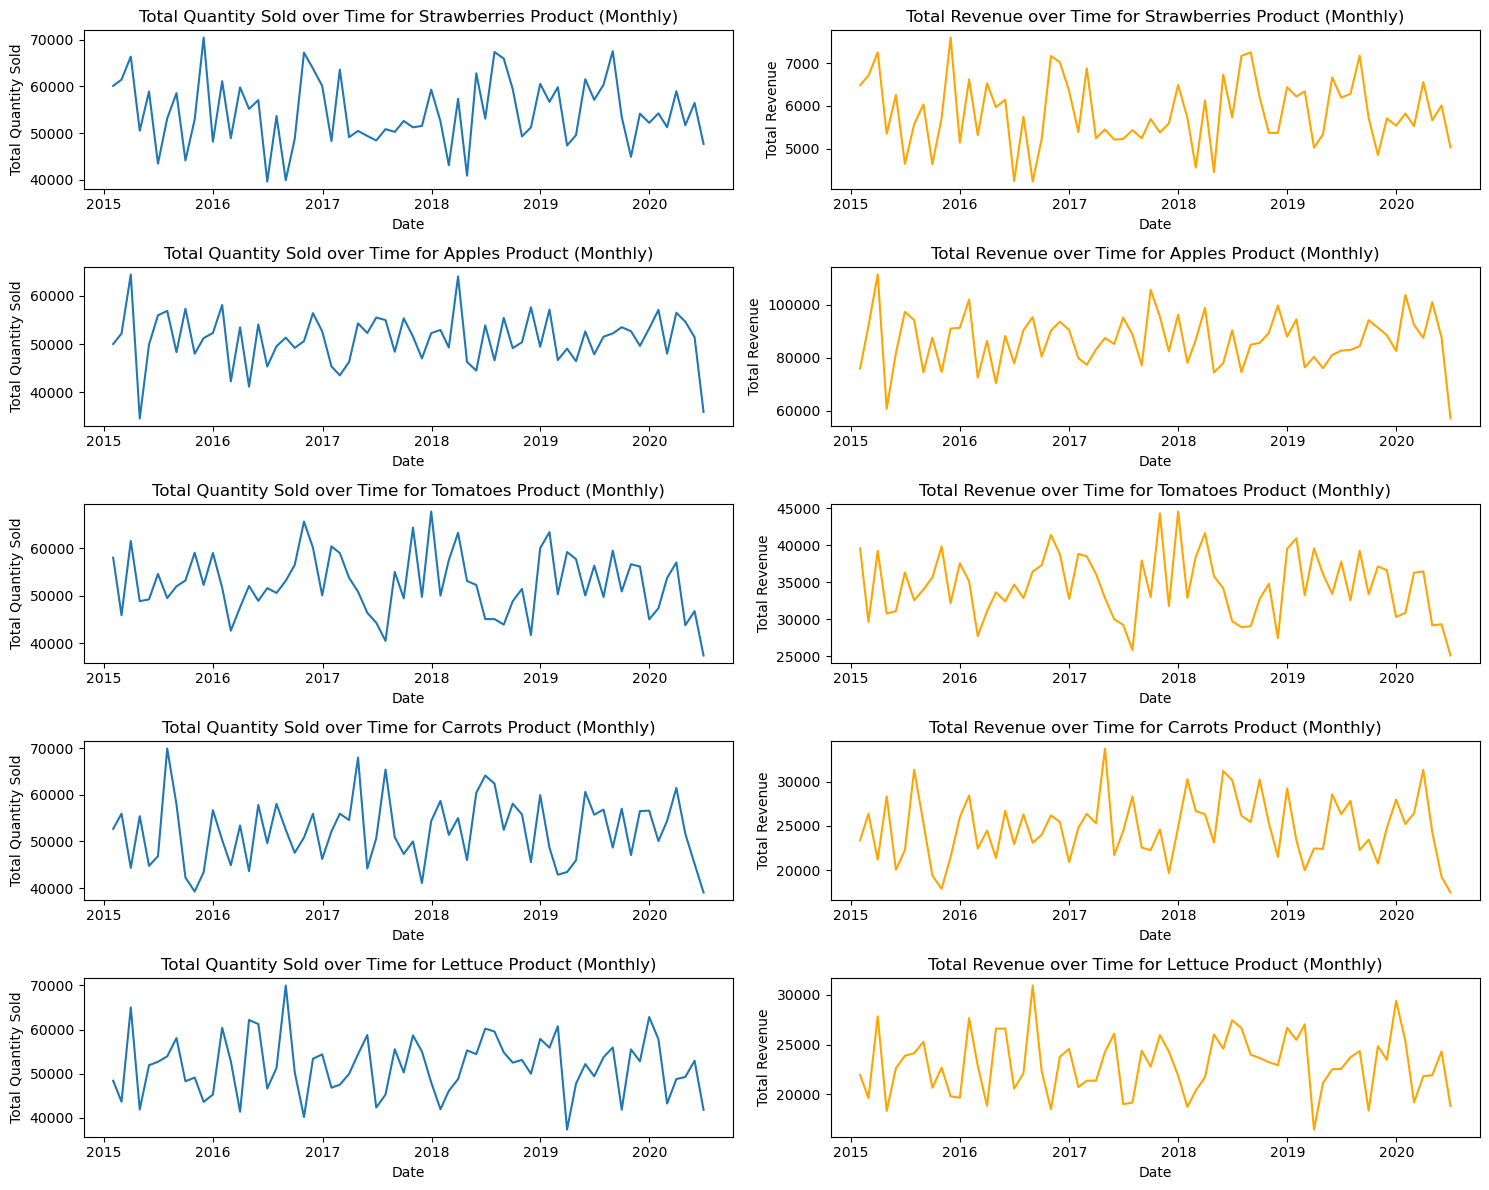

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

products = df['Product'].unique()

# Create subplots based on the number of products
fig, ax = plt.subplots(len(products), 2, figsize=(15, 12))

# Loop through each product
for i, product in enumerate(products):
    # Filter data for the specific product
    time_based_data = df[df['Product'] == product]

    # Aggregate sales and revenue data by date
    time_based_data = time_based_data.groupby('Date').agg({
        'Quantity_Sold': 'sum',
        'Revenue': 'sum'
    }).reset_index()

    # Resample data to monthly frequency
    time_based_data = time_based_data.set_index('Date').resample('M').sum().reset_index()

    # Quantity Sold over Time
    sns.lineplot(data=time_based_data, x='Date', y='Quantity_Sold', ax=ax[i, 0])
    ax[i, 0].set_title(f'Total Quantity Sold over Time for {product} Product (Monthly)')
    ax[i, 0].set_ylabel('Total Quantity Sold')

    # Revenue over Time
    sns.lineplot(data=time_based_data, x='Date', y='Revenue', ax=ax[i, 1], color='orange')
    ax[i, 1].set_title(f'Total Revenue over Time for {product} Product (Monthly)')
    ax[i, 1].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

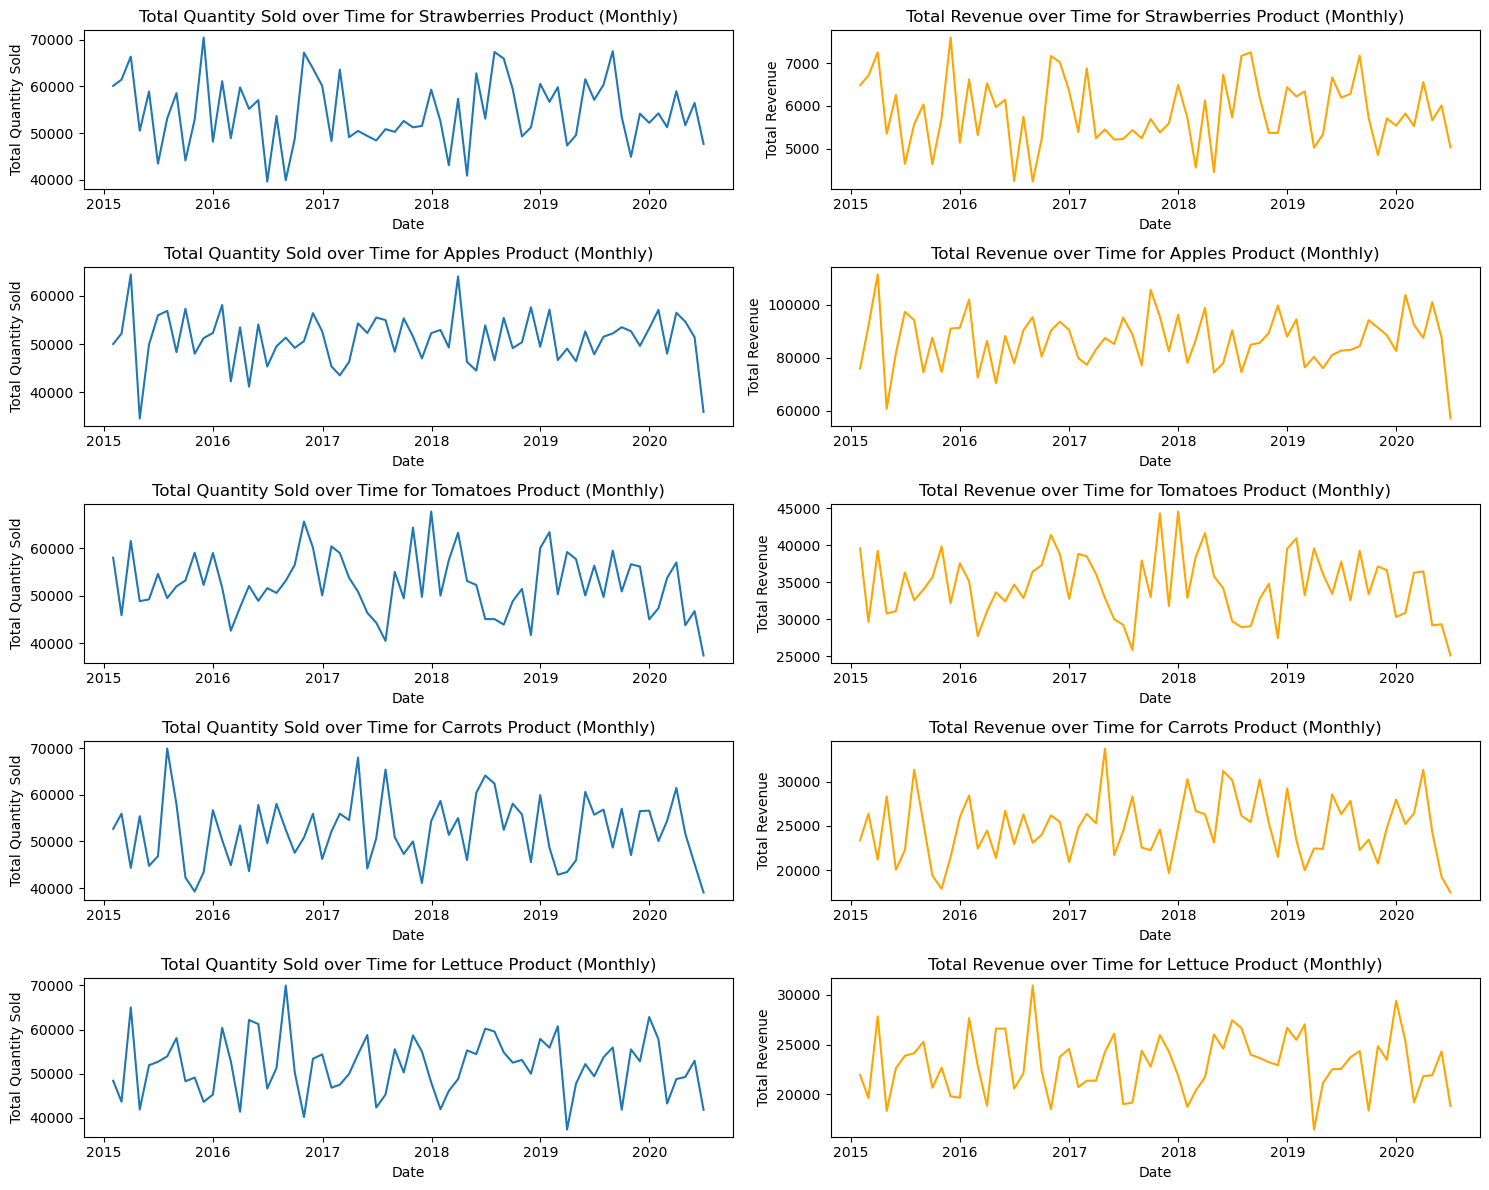

Plot saved in: output_plots\time_series_plots.png


In [73]:
# This is the same with the above, but the difference is I created a folder to salve the output for easy download
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create an output folder if it doesn't exist
output_folder = "output_plots"
os.makedirs(output_folder, exist_ok=True)

# Create subplots based on the number of products
fig, ax = plt.subplots(len(products), 2, figsize=(15, 12))

# Loop through each product
for i, product in enumerate(products):
    # Filter data for the specific product
    time_based_data = df[df['Product'] == product]

    # Aggregate sales and revenue data by date
    time_based_data = time_based_data.groupby('Date').agg({
        'Quantity_Sold': 'sum',
        'Revenue': 'sum'
    }).reset_index()

    # Resample data to monthly frequency
    time_based_data = time_based_data.set_index('Date').resample('M').sum().reset_index()

    # Quantity Sold over Time
    sns.lineplot(data=time_based_data, x='Date', y='Quantity_Sold', ax=ax[i, 0])
    ax[i, 0].set_title(f'Total Quantity Sold over Time for {product} Product (Monthly)')
    ax[i, 0].set_ylabel('Total Quantity Sold')

    # Revenue over Time
    sns.lineplot(data=time_based_data, x='Date', y='Revenue', ax=ax[i, 1], color='orange')
    ax[i, 1].set_title(f'Total Revenue over Time for {product} Product (Monthly)')
    ax[i, 1].set_ylabel('Total Revenue')

plt.tight_layout()

# Save the figure inside the output folder
output_path = os.path.join(output_folder, "time_series_plots.png")
plt.savefig(output_path)
plt.show()

print(f"Plot saved in: {output_path}")

## Feature Engineering

We are going to be splitting data into train and test sets

In [194]:
# Feature Engineering: Splitting the dataset into train and test sets

# Initialize empty dictionaries to store train and test data for each product
train_data = dict()
test_data = dict()

# Loop through each product in the dataset
for product in products:
    # Filter the dataframe for the current product
    df_product = df[df['Product'] == product]

    # Aggregate the data by 'Date', summing up 'Quantity_Sold' and 'Revenue'
    df_product = df_product.groupby('Date').agg({
        'Quantity_Sold': 'sum',
        'Revenue': 'sum'
    }).reset_index()

    # Resample the data to monthly frequency and sum up values within each month
    df_product = df_product.set_index('Date').resample('M').sum().reset_index()

    # Split the data into training set (before 2019)
    train_data[product] = df_product[df_product['Date'].dt.year < 2019].reset_index()

    # Optional: You can also create a test dataset for years >= 2019
    test_data[product] = df_product[df_product['Date'].dt.year >= 2019].reset_index()

# Now, train_data contains sales data for each product before 2019,
# while test_data contains sales data from 2019 onward.


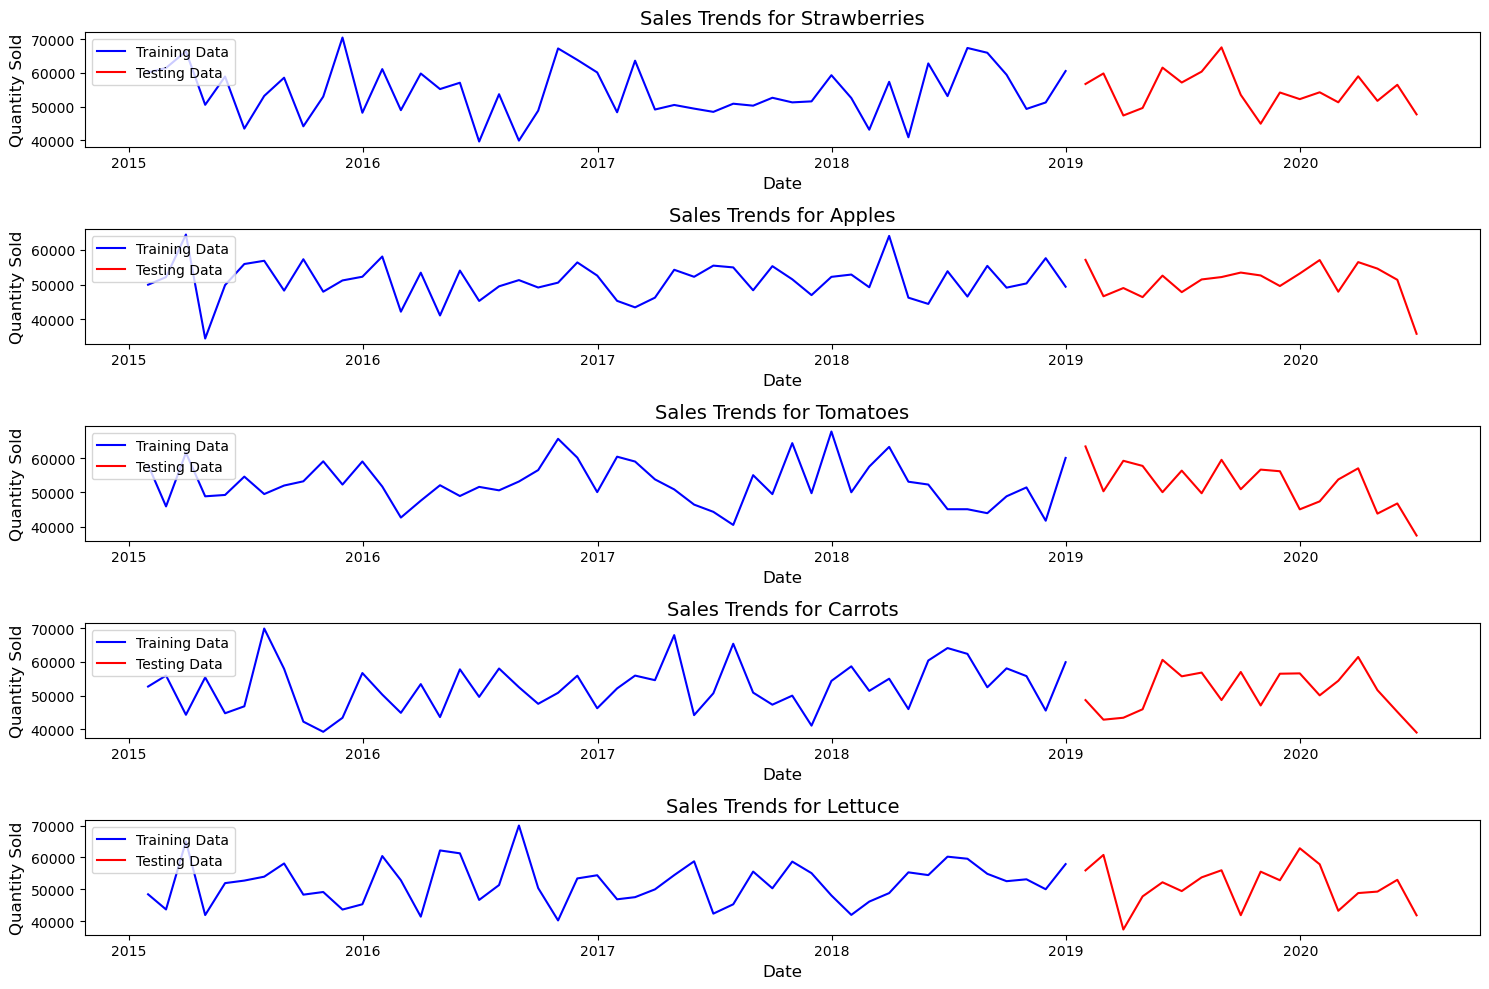

In [76]:
import matplotlib.pyplot as plt

# Create subplots for visualization
fig, ax = plt.subplots(len(products), 1, figsize=(15, 10))

# Loop through each product and plot training and testing data
for i, product in enumerate(products):
    # Plot training data (before 2019) in blue
    ax[i].plot(train_data[product]['Date'],   # X-axis: Date from training data
               train_data[product]['Quantity_Sold'],  # Y-axis: Quantity Sold
               color='blue', label='Training Data')  # Color for training data

    # Plot testing data (2019 and beyond) in red
    ax[i].plot(test_data[product]['Date'],   # X-axis: Date from test data
               test_data[product]['Quantity_Sold'],  # Y-axis: Quantity Sold
               color='red', label='Testing Data')  # Color for test data

    # Set title for each subplot
    ax[i].set_title(f'Sales Trends for {product}', fontsize=14)

    # Set x-axis label
    ax[i].set_xlabel('Date', fontsize=12)

    # Set y-axis label
    ax[i].set_ylabel('Quantity Sold', fontsize=12)

    # Add a legend to distinguish training vs testing data
    ax[i].legend(['Training Data', 'Testing Data'], loc = 'upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## The models that will be used include: 
1. ARIMA
2. Prophet
3. RandomforestRegressor

## For Evaluations, we will be using:
1. Mean Absolute Errror (MAE),
2. Root Mean Square Error (RMSE)
3. Mean Absolute Percentage Error (MAPE)

## Forcasting with ARIMA

In [228]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    """
    Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity in a time series.
    
    Parameters:
    series (pd.Series): Time series data to test for stationarity.
    
    Returns:
    pd.Series: A series containing the test statistic, p-value, number of lags used, 
               number of observations used, and critical values.
    """
    
    # Perform the Augmented Dickey-Fuller test on the given series
    result = adfuller(series)

    # Store the first four results (Test Statistic, p-value, #lags used, #observations used) in a Pandas Series
    dfoutput = pd.Series(result[0:4], 
                         index=['Test Statistic',  # The test statistic value
                                'p-value',         # The p-value to check significance
                                '#lags used',      # Number of lags used in the test
                                'number of observations used'])  # Number of observations considered in the test
    
    # Extract and add critical values to the output series
    for key, value in result[4].items():
        dfoutput['critical value (%s)' % key] = value  # Store critical values for different significance levels

    # Return the results of the ADF test
    return dfoutput

## Perform the stationarity test

In [230]:
import pandas as pd

# Initialize an empty dictionary to store stationarity test results for each product
stationarity_test = dict()

# Iterate over each product in the list of products
for product in products:
    # Concatenate training and testing data for the current product to form a complete time series
    product_data = pd.concat([train_data[product], test_data[product]])

    # Perform the Augmented Dickey-Fuller (ADF) stationarity test on the 'Quantity_Sold' column
    stationarity_test[product] = adf_test(product_data['Quantity_Sold'])

# Convert the results dictionary into a Pandas DataFrame for better readability
pd.DataFrame(stationarity_test)


Strawberries        Apples   Tomatoes  \
Test Statistic                  -5.058980 -9.876209e+00  -4.368359   
p-value                          0.000017  3.876435e-17   0.000338   
#lags used                       2.000000  0.000000e+00   8.000000   
number of observations used     63.000000  6.500000e+01  57.000000   
critical value (1%)             -3.538695 -3.535217e+00  -3.550670   
critical value (5%)             -2.908645 -2.907154e+00  -2.913766   
critical value (10%)            -2.591897 -2.591103e+00  -2.594624   

                                  Carrots       Lettuce  
Test Statistic              -7.209263e+00 -7.433840e+00  
p-value                      2.257203e-10  6.258368e-11  
#lags used                   0.000000e+00  1.000000e+00  
number of observations used  6.500000e+01  6.400000e+01  
critical value (1%)         -3.535217e+00 -3.536928e+00  
critical value (5%)         -2.907154e+00 -2.907887e+00  
critical value (10%)        -2.591103e+00 -2.591493e+00

## Plot ACF and PACF

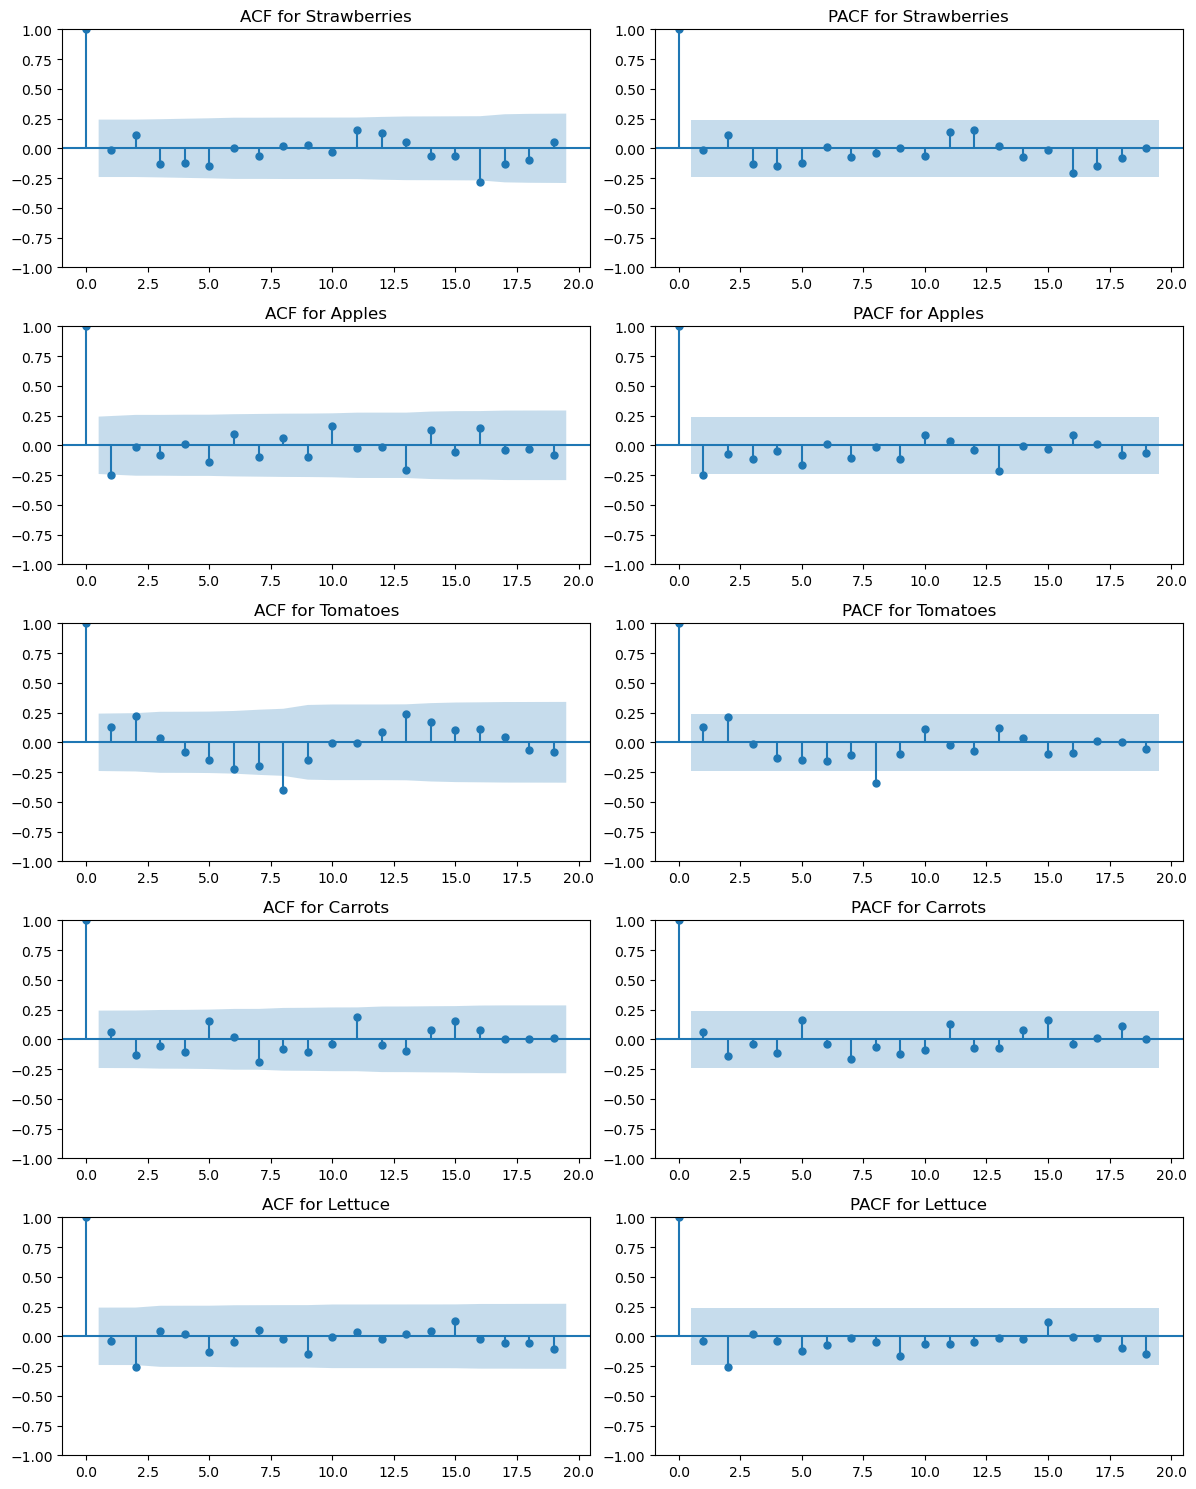

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(len(products), 2, figsize=(12, 15))

for i, product in enumerate(products):
    product_data = pd.concat([train_data[product], test_data[product]])
    acf_plot = plot_acf(product_data['Quantity_Sold'], ax=ax[i][0], title=f'ACF for {product}')
    pacf_plot = plot_pacf(product_data['Quantity_Sold'], ax=ax[i][1], title=f'PACF for {product}')

plt.tight_layout()
plt.show()

**This plot below is the same to the one above. The difference is that I created a folder to save the output for easy doweload**

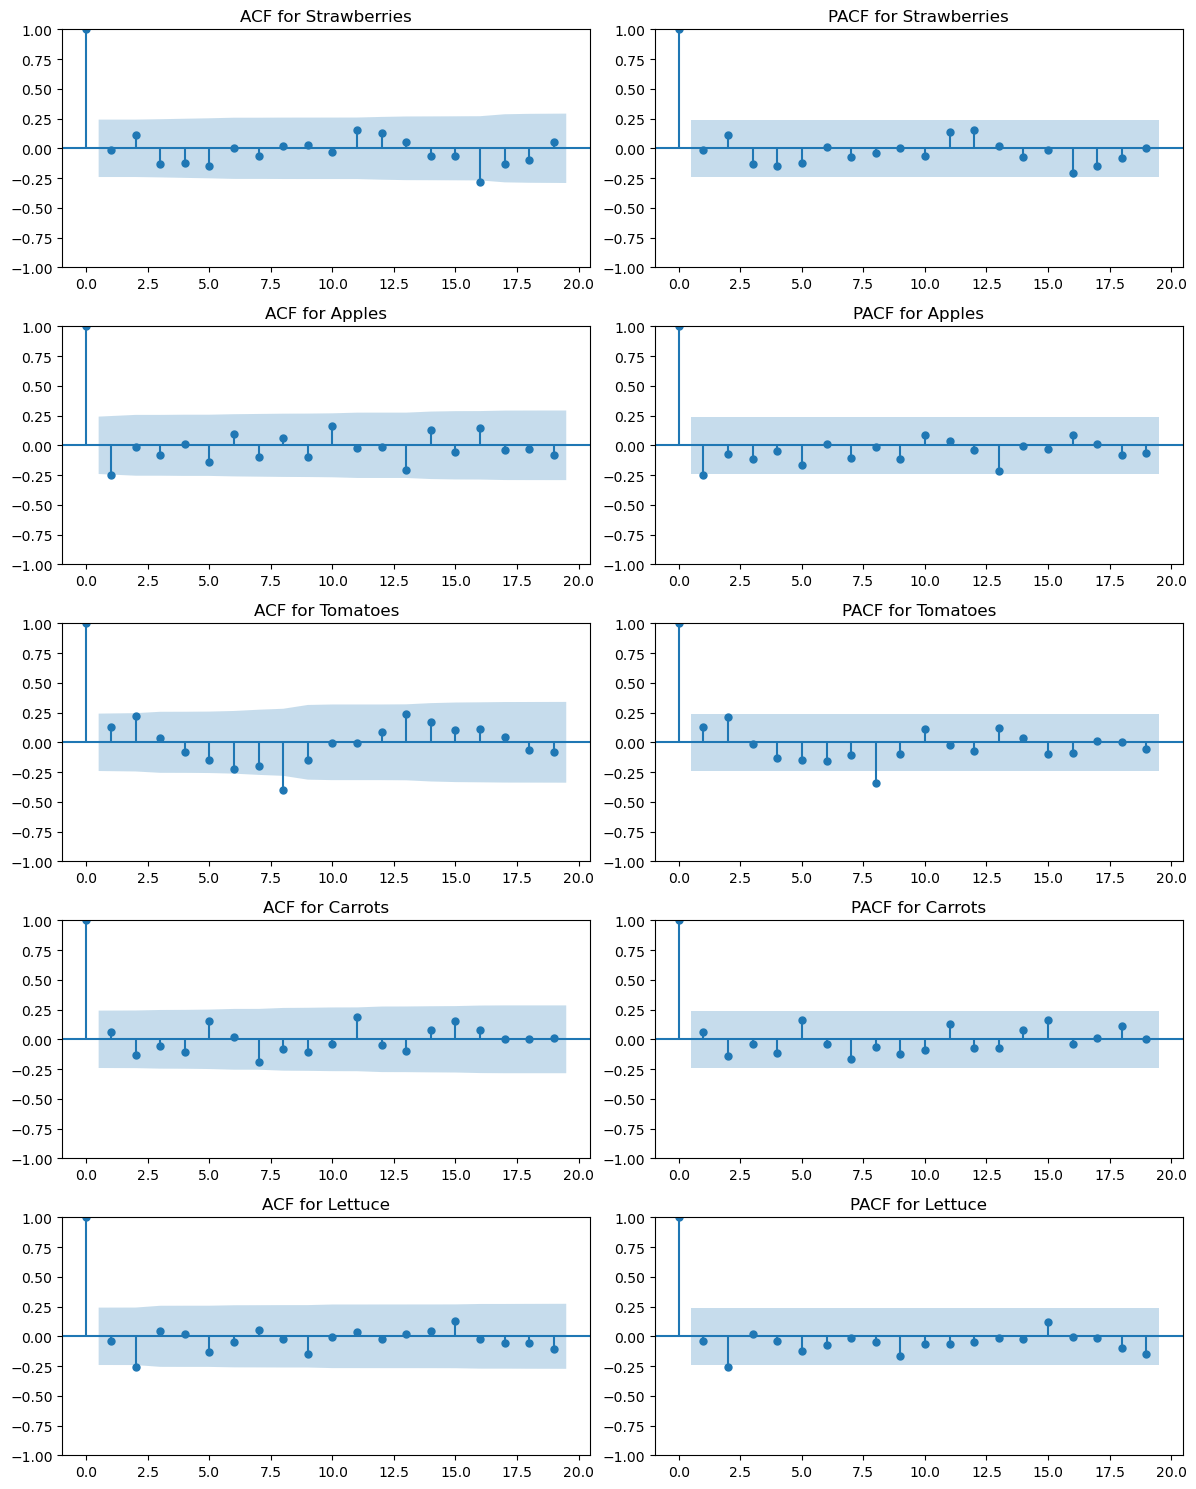

Plots saved successfully at: ACF_PACF_Plots/ACF_PACF_Plots.png


In [84]:
# Import necessary libraries
import os  # Library to handle directory creation
import pandas as pd  # Library for data manipulation
import matplotlib.pyplot as plt  # Library for plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF and PACF plots

# Define the folder path to save the plots
output_folder = "ACF_PACF_Plots"

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create subplots with the number of rows equal to the number of products and 2 columns (ACF and PACF)
fig, ax = plt.subplots(len(products), 2, figsize=(12, 15))

# Loop through each product to generate ACF and PACF plots
for i, product in enumerate(products):
    # Concatenate training and testing data for the product
    product_data = pd.concat([train_data[product], test_data[product]])

    # Plot the ACF (Autocorrelation Function) for the product's Quantity_Sold
    acf_plot = plot_acf(product_data['Quantity_Sold'], ax=ax[i][0], title=f'ACF for {product}')

    # Plot the PACF (Partial Autocorrelation Function) for the product's Quantity_Sold
    pacf_plot = plot_pacf(product_data['Quantity_Sold'], ax=ax[i][1], title=f'PACF for {product}')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the plots
plt.show()

# Save the figure to the output folder
plot_path = f"{output_folder}/ACF_PACF_Plots.png"
fig.savefig(plot_path)

print(f"Plots saved successfully at: {plot_path}")

## Build the models, and evaluate them 

In [204]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA  # Import ARIMA model for forecasting

# Initialize evaluation metrics (Mean Absolute Error, Root Mean Square Error, Mean Absolute Percentage Error)
mae, rmse, mape = 0, 0, 0

# Dictionary to store MAPE scores for different products
arima_mape_scores = dict()

# Dictionary to store forecasts for different products
arima_forecasts = dict()

# Loop through each product to train an ARIMA model and make predictions
for product in products:
    # Extract training data (Quantity_Sold values) for the product
    train = train_data[product]['Quantity_Sold'].values
    
    # Extract test data (Quantity_Sold values) for the product
    test = test_data[product]['Quantity_Sold'].values

    # Define ARIMA model with order (1, 0, 1)
    # (1, 0, 1) represents: 
    # 1 = autoregressive (AR) term
    # 0 = differencing (I - integrated)
    # 1 = moving average (MA) term
    model = ARIMA(train, order=(1, 0, 1))

    # Fit the ARIMA model on training data
    model_fit = model.fit()

    # Forecast the future values for the same length as the test data
    forecast = model_fit.forecast(steps=len(test))

    # Store the forecasted values in the arima_forecasts dictionary
    arima_forecasts[product] = forecast

# The forecasted values for each product are stored in the dictionary arima_forecasts.

# Calculate the Mean Absolute Error (MAE) between actual and forecasted values
product_mae = mean_absolute_error(test, forecast)

# Calculate the Root Mean Square Error (RMSE) between actual and forecasted values
# The parameter `squared=False` ensures we take the square root of MSE to get RMSE
product_rmse = mean_squared_error(test, forecast, squared=False)

# Calculate the Mean Absolute Percentage Error (MAPE) between actual and forecasted values
# Multiply by 100 to express it as a percentage
product_mape = mean_absolute_percentage_error(test, forecast) * 100

# Accumulate the MAE value for all products
mae += product_mae

# Accumulate the RMSE value for all products
rmse += product_rmse

# Accumulate the MAPE value for all products
mape += product_mape

# Store the MAPE score for the current product in the dictionary
arima_mape_scores[product] = product_mape

# `n_products` is likely used elsewhere in the script to count the number of products
n_products = len(products)

# Compute the average Mean Absolute Error (MAE) across all products
mae /= n_products  

# Compute the average Root Mean Square Error (RMSE) across all products
rmse /= n_products  

# Compute the average Mean Absolute Percentage Error (MAPE) across all products
mape /= n_products  

# Print the final average Mean Absolute Error (MAE) value
print('MAE:', mae)  

# Print the final average Root Mean Square Error (RMSE) value
print('RMSE:', rmse)  

# Print the final average Mean Absolute Percentage Error (MAPE) value
print('MAPE:', mape)  

MAE: 1073.5535270650184
RMSE: 1384.816306086467
MAPE: 2.2560527722190438


## Plot the train, test, and forecast data

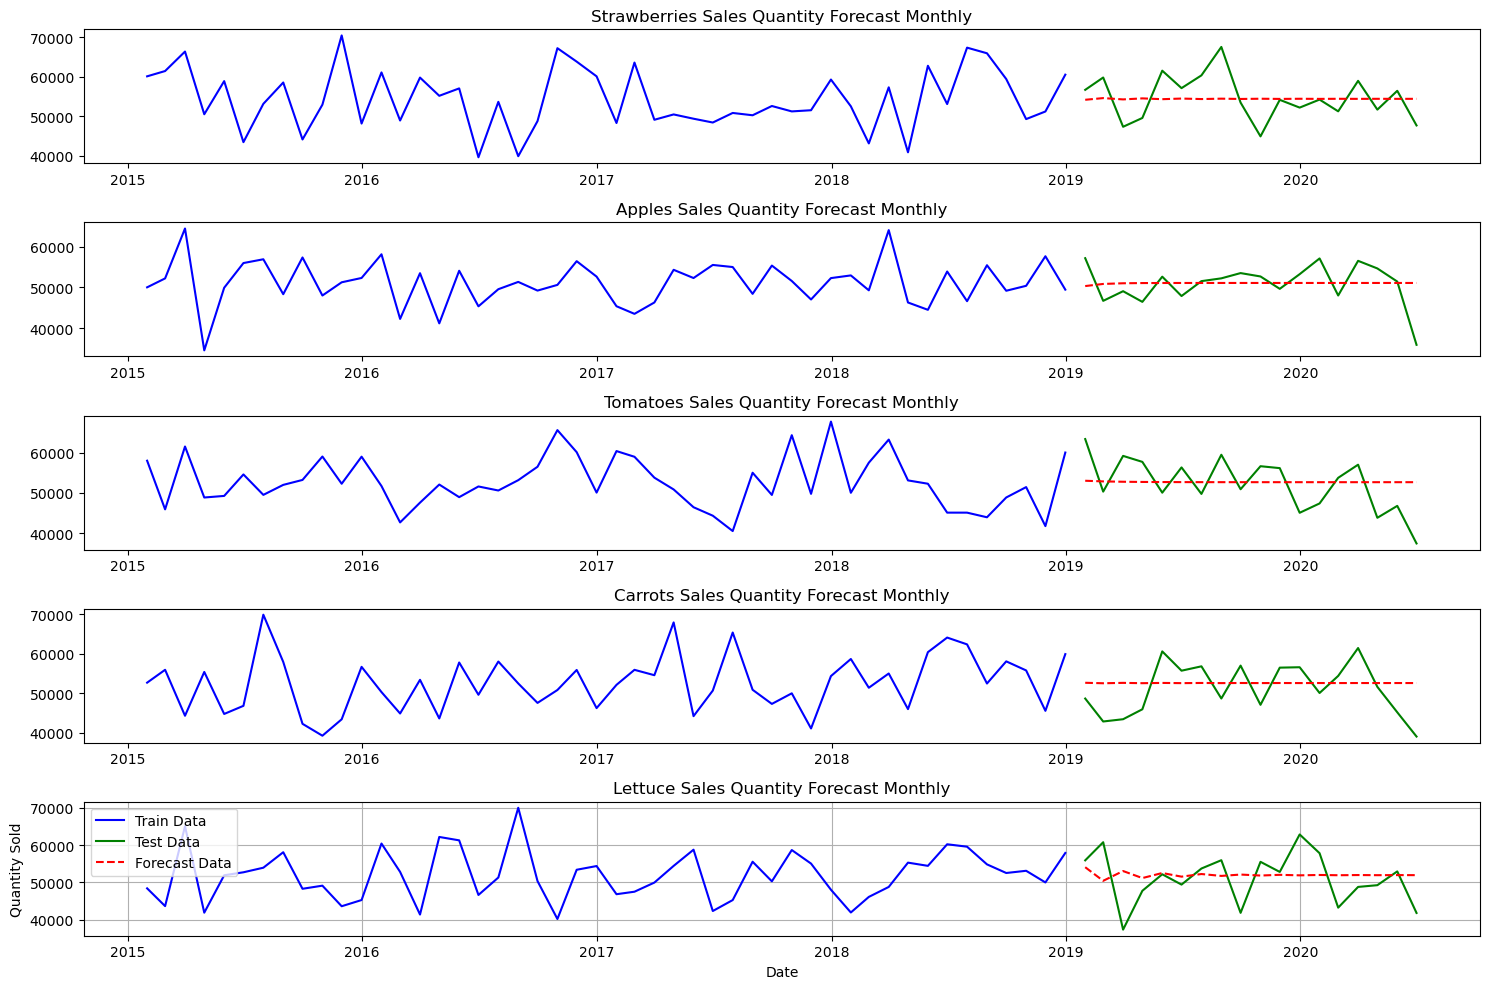

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Set the figure size

# Loop through each product to create subplots
for i, product in enumerate(products):
    plt.subplot(n_products, 1, i+1)  # Create a subplot for each product

    # Plot the actual training data (in blue)
    plt.plot(train_data[product]['Date'],  
             train_data[product]['Quantity_Sold'],  
             label='Actual Quantity Sold (Train Data)', 
             color='blue')

    # Plot the actual testing data (in green)
    plt.plot(test_data[product]['Date'],  
             test_data[product]['Quantity_Sold'],  
             label='Actual Quantity Sold (Test Data)', 
             color='green')

    # Plot the ARIMA forecast data (in red with dashed line)
    plt.plot(test_data[product]['Date'],  
             arima_forecasts[product],  # Fixed indexing here
             label='Forecast Quantity to be Sold',
             color='red',
             linestyle='--')  # Fixed the typo (linestyle)

    # Set the title for each product's plot
    plt.title(f'{product} Sales Quantity Forecast Monthly')

# Set common labels and legend
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Quantity Sold')  # Label for the y-axis
plt.legend(['Train Data', 'Test Data', 'Forecast Data'])  # Legend for all plots
plt.grid(True)  # Add grid lines for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


## Forecasting with Prophet

**We will train, and evaluate the model**

In [210]:
# Initialize evaluation metrics (Mean Absolute Error, Root Mean Square Error, Mean Absolute Percentage Error)
mae, rmse, mape = 0, 0, 0  
# These variables will store the cumulative MAE, RMSE, and MAPE values, which will later be averaged.

# Initialize empty dictionaries to store Prophet models, forecasts, and MAPE scores
prophet_models = dict()  
prophet_forecasts = dict()  
prophet_mape_scores = dict()  

# Import Prophet from Facebook's Prophet library
from prophet import Prophet  

# Dictionary to store trained models and forecasts (redundant since already defined above)
prophet_models = {}  
prophet_forecasts = {}  

# Loop through each product in the dataset
for product in products:  
    # Extract training and test data for the product
    train = train_data[product][['Date', 'Quantity_Sold']]  
    test = test_data[product][['Date', 'Quantity_Sold']]  

    # Rename columns to match Prophet's expected format ('ds' for date, 'y' for value to predict)
    train.columns = ['ds', 'y']  
    test.columns = ['ds', 'y']  

    # Initialize Prophet model with yearly seasonality (monthly and weekly are disabled)
    model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=False)  

    # Fit the Prophet model using the training data
    model_prophet.fit(train)  

    # Store the trained model for future reference
    prophet_models[product] = model_prophet  

    # Generate future dates for prediction (equal to the test data length)
    future_dates = model_prophet.make_future_dataframe(periods=len(test), freq='M')  

    # Predict sales using the trained Prophet model
    all_forecast = model_prophet.predict(future_dates)  

    # Store the forecast results in the dictionary
    prophet_forecasts[product] = all_forecast  

    # Extract only the forecasted values corresponding to the test period
    test_forecast = all_forecast[-len(test):]  

    # Compute the Mean Absolute Error (MAE) for the product
    product_mae = mean_absolute_error(test['y'], test_forecast['yhat'])  

    # Compute the Root Mean Square Error (RMSE) for the product
    product_rmse = mean_squared_error(test['y'], test_forecast['yhat'], squared=False)  

    # Compute the Mean Absolute Percentage Error (MAPE) for the product
    product_mape = mean_absolute_percentage_error(test['y'], test_forecast['yhat']) * 100  

    prophet_mape_scores[product] = product_mape
    # Accumulate the error metrics for later averaging
    mae += product_mae  
    rmse += product_rmse  
    mape += product_mape  

# Compute the average error metrics across all products
mae /= n_products  
rmse /= n_products  
mape /= n_products  

# Print the final evaluation metrics
print('\nMAE:', mae)  
print('RMSE:', rmse)  
print('MAPE:', mape)  

20:56:40 - cmdstanpy - INFO - Chain [1] start processing
20:56:40 - cmdstanpy - INFO - Chain [1] done processing
20:56:41 - cmdstanpy - INFO - Chain [1] start processing
20:56:41 - cmdstanpy - INFO - Chain [1] done processing
20:56:41 - cmdstanpy - INFO - Chain [1] start processing
20:56:42 - cmdstanpy - INFO - Chain [1] done processing
20:56:42 - cmdstanpy - INFO - Chain [1] start processing
20:56:42 - cmdstanpy - INFO - Chain [1] done processing
20:56:43 - cmdstanpy - INFO - Chain [1] start processing
20:56:43 - cmdstanpy - INFO - Chain [1] done processing



MAE: 6557.378688869758
RMSE: 8136.562065696507
MAPE: 13.280854877120092


## Visualise the result

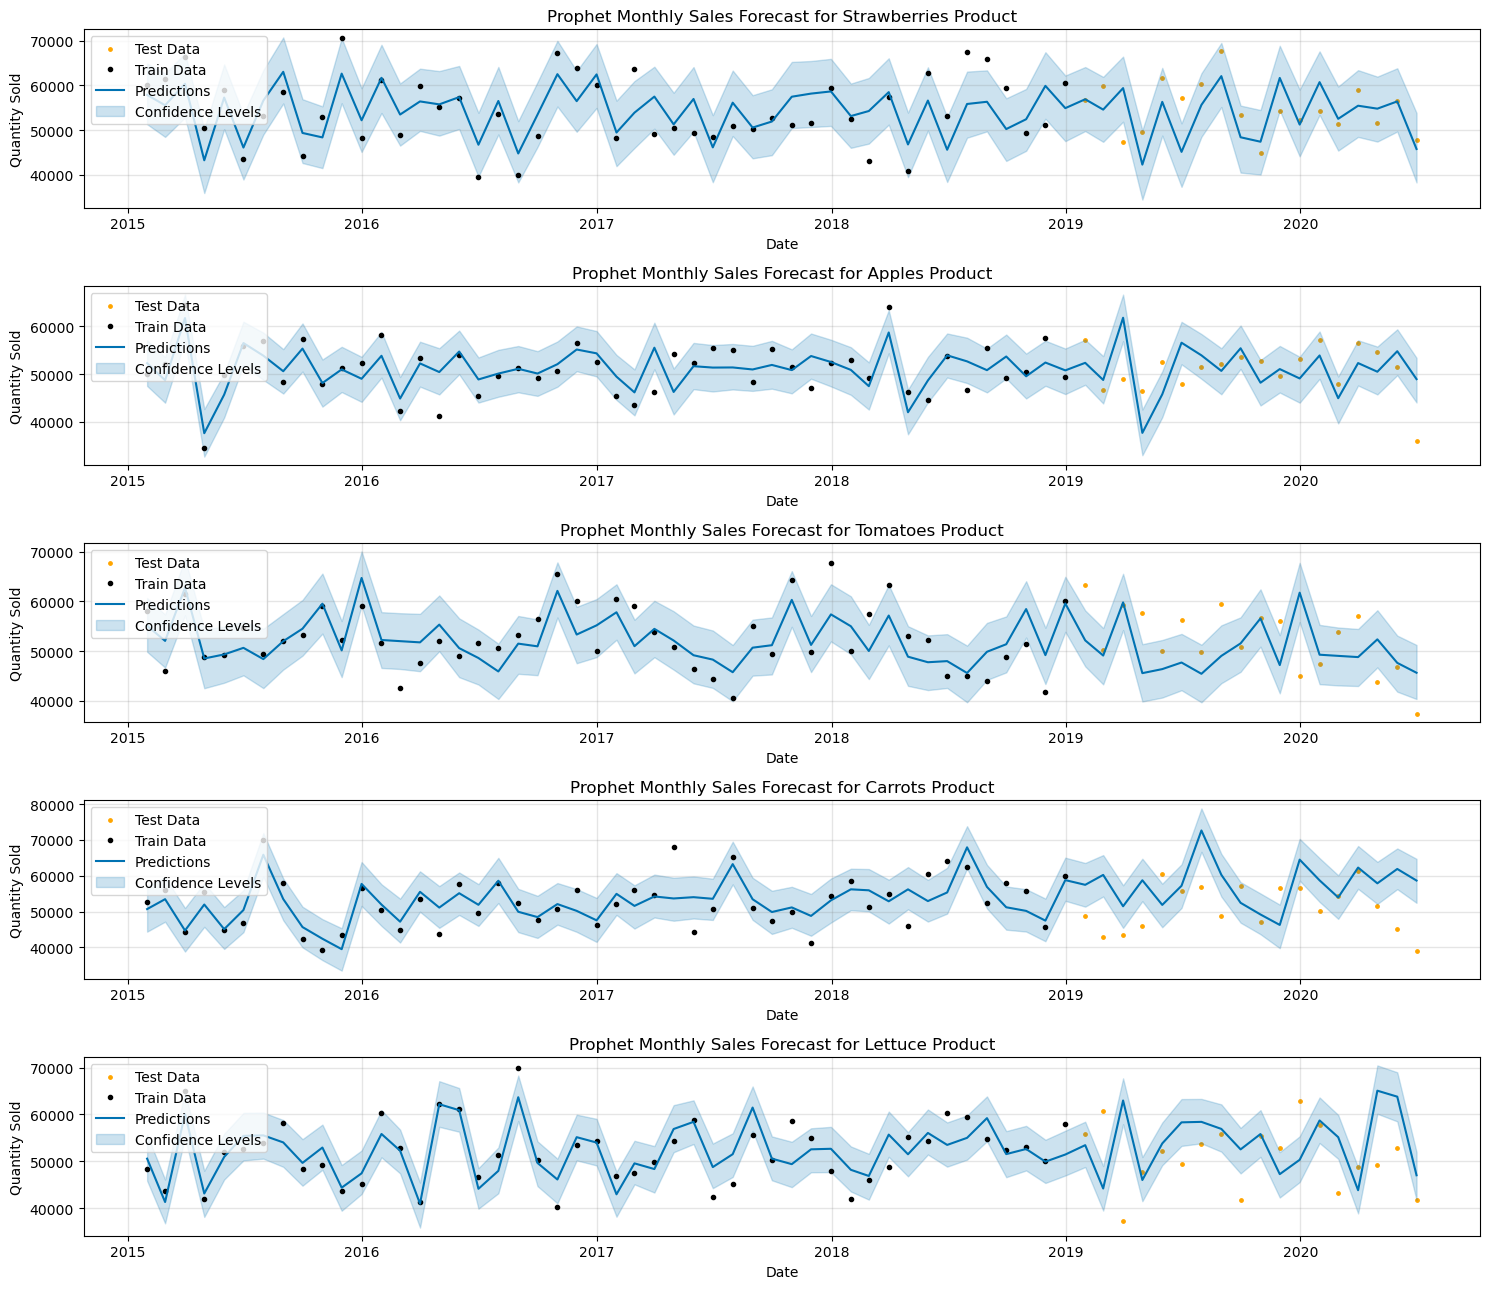

In [212]:
# Create a figure with multiple subplots: `n_product` rows, 1 column
# The figure size is set to (15, 13) for better readability
fig, ax = plt.subplots(n_products, 1, figsize=(15, 13))

# Iterate over each product and its index in the `products` list
for i, product in enumerate(products):  
    # Scatter plot for test data (actual sales data for evaluation)
    ax[i].scatter(test_data[product]['Date'],   # X-axis: Date
                  test_data[product]['Quantity_Sold'],  # Y-axis: Quantity sold
                  color='orange',  # Set color to orange
                  s=6)  # Set marker size to 6 for visibility

    # Plot Prophet forecast for the current product using its trained model
    category_plot = prophet_models[product].plot(
        prophet_forecasts[product],  # Forecasted values
        ax=ax[i],  # Plot on the current subplot
        figsize=(15, 7)  # Set the figure size for the plot
    )

    # Set the title for each subplot to indicate the product being forecasted
    ax[i].set_title(f'Prophet Monthly Sales Forecast for {product} Product')

    # Label the X-axis as 'Date' to indicate the time period
    ax[i].set_xlabel('Date')

    # Label the Y-axis as 'Quantity Sold' to indicate the number of units sold
    ax[i].set_ylabel('Quantity Sold')

    # Add a legend to clarify what each line/point represents
    ax[i].legend(['Test Data', 'Train Data', 'Predictions', 'Confidence Levels'], loc='upper left')

# Adjust layout to prevent overlapping of plots and labels
plt.tight_layout()

# Display the plot
plt.show()

**This plot below is the same to the one above. The difference is that I created a folder to save the output for easy doweload**

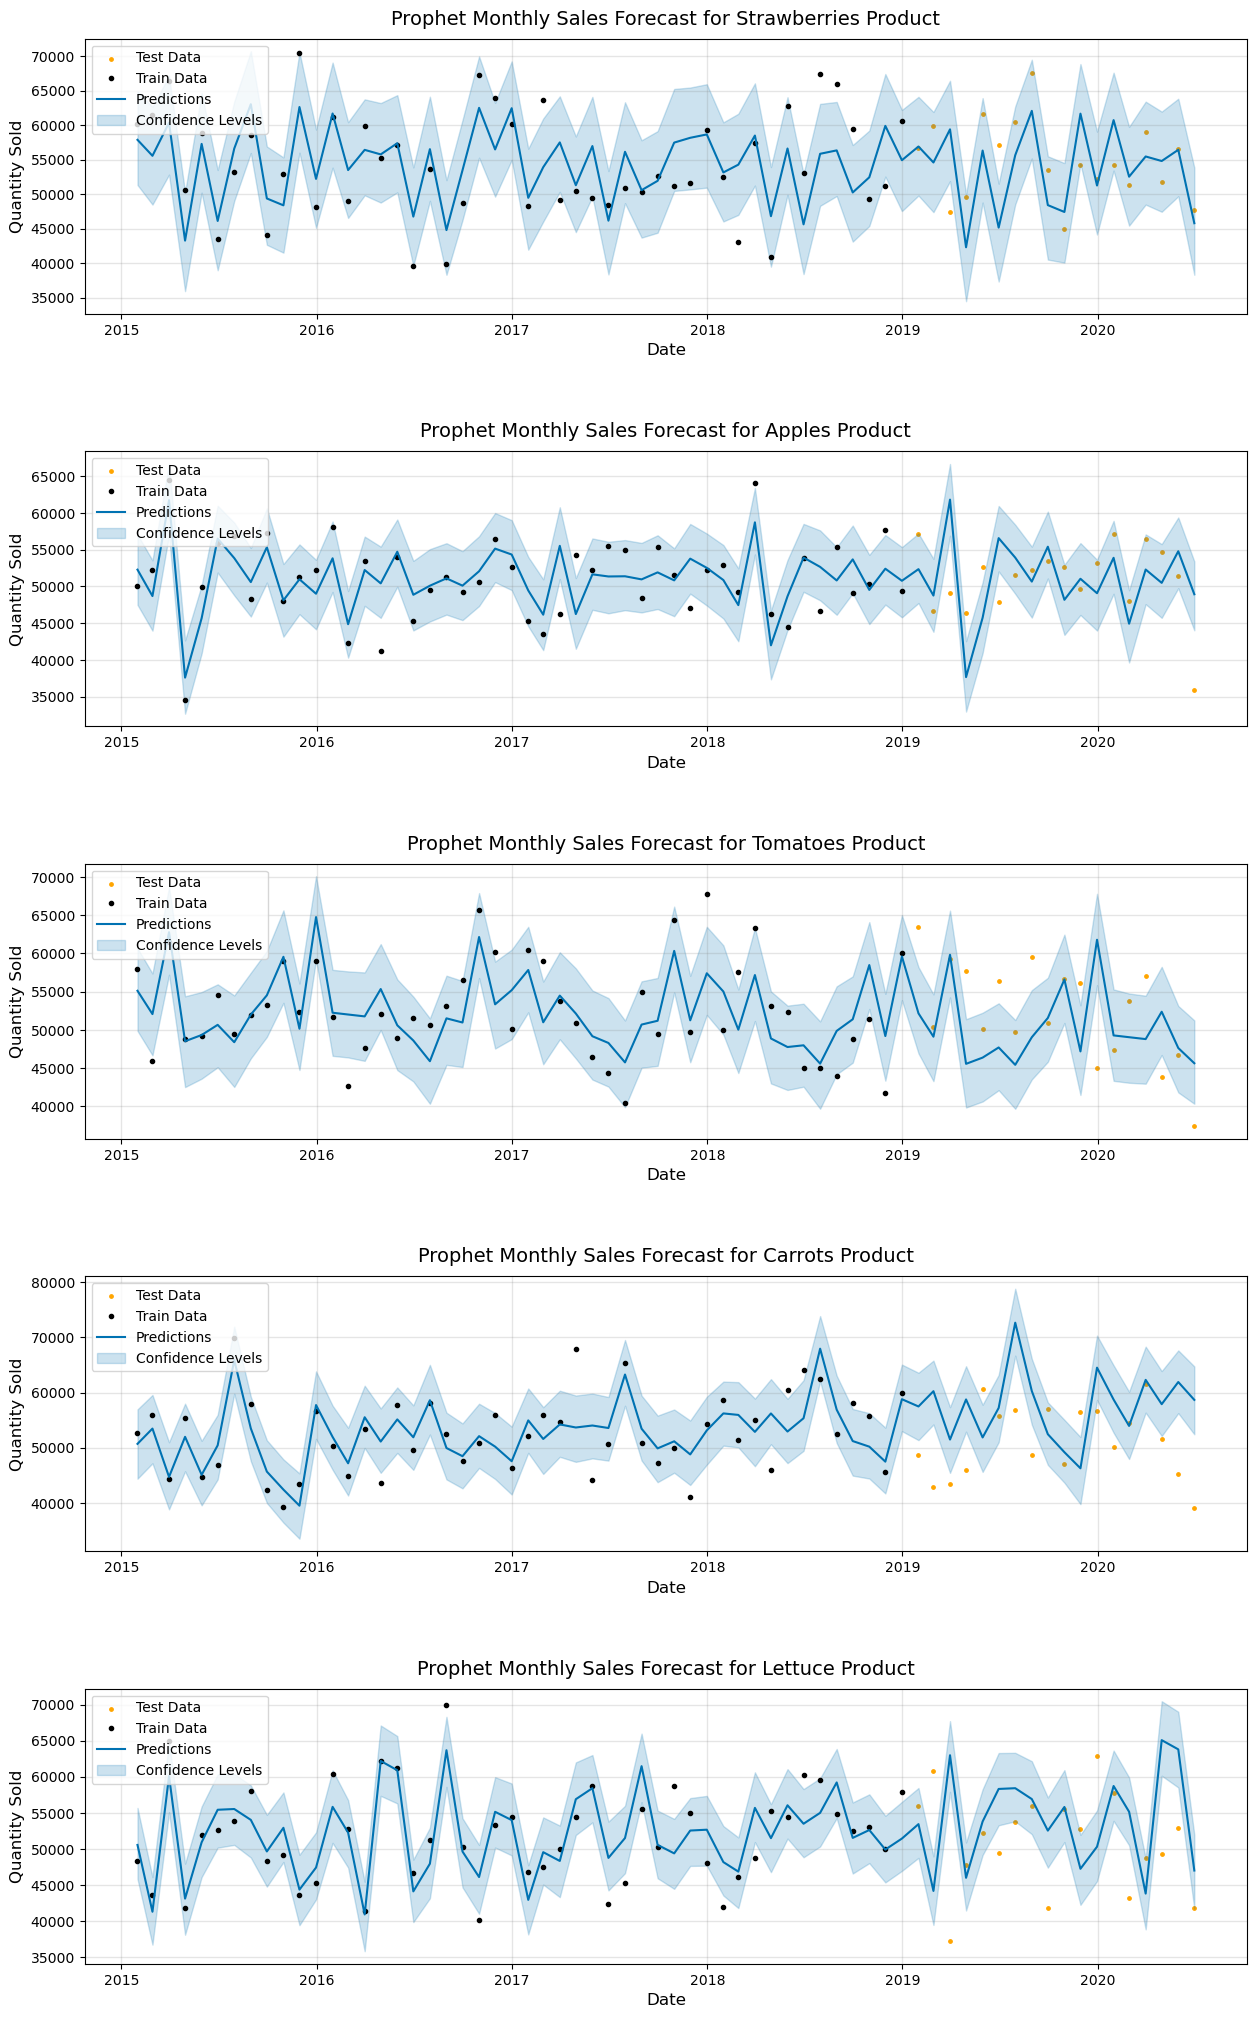

Plot saved in 'forecast_plots' folder.


In [216]:
import os
import matplotlib.pyplot as plt

# Create a directory to store plots if it does not exist
output_folder = "forecast_plots"
os.makedirs(output_folder, exist_ok=True)

# Increase figure size for better spacing
fig, ax = plt.subplots(n_products, 1, figsize=(15, 5 * n_products))

# Iterate over each product
for i, product in enumerate(products):  
    # Scatter plot for test data (actual sales data for evaluation)
    ax[i].scatter(test_data[product]['Date'],   
                  test_data[product]['Quantity_Sold'],  
                  color='orange',  
                  s=6)  

    # Plot Prophet forecast for the current product using its trained model
    category_plot = prophet_models[product].plot(
        prophet_forecasts[product],  
        ax=ax[i]
    )

    # Set title and labels
    ax[i].set_title(f'Prophet Monthly Sales Forecast for {product} Product', fontsize=14, pad=10)
    ax[i].set_xlabel('Date', fontsize=12)
    ax[i].set_ylabel('Quantity Sold', fontsize=12)

    # Add legend
    ax[i].legend(['Test Data', 'Train Data', 'Predictions', 'Confidence Levels'], loc='upper left')

# Adjust layout to prevent label overlap
plt.subplots_adjust(hspace=0.5)  # Increase spacing between subplots

# Save the figure as a single file
plot_filename = os.path.join(output_folder, "all_products_forecast.png")
fig.savefig(plot_filename, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved in '{output_folder}' folder.")

## Forecasting with RandomForestRegressor 

**Train and Evaluate the model**

In [218]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Initialize evaluation metrics for model performance tracking
mae, rmse, mape = 0, 0, 0  

# Dictionaries to store model data and results
rf_mape_scores = dict()  # Stores MAPE (Mean Absolute Percentage Error) values for each product
rf_x_train_dates = dict()  # Stores training feature set dates for each product
rf_y_train = dict()  # Stores training target values (Quantity Sold) for each product
rf_x_test_dates = dict()  # Stores test feature set dates for each product
rf_y_test = dict()  # Stores test target values (Quantity Sold) for each product
rf_forecasts = dict()  # Stores forecasted values for each product

# Iterate through each product in the dataset
for product in products:
    # Filter the dataframe to keep only rows corresponding to the current product
    df_product = df[df['Product'] == product].copy()  # Added `.copy()` to avoid SettingWithCopyWarning

    # Ensure 'Date' is in datetime format
    df_product['Date'] = pd.to_datetime(df_product['Date'])

    # Apply dummy/one-hot encoding to categorical variables (drop_first=True avoids multicollinearity)
    df_product = pd.get_dummies(df_product, drop_first=True)  

    # Resample data to a monthly frequency and sum up values for each month
    df_product = df_product.set_index('Date').resample('M').sum().reset_index()

    # Check for duplicate dates after resampling
    # duplicates_count = df_product.duplicated(subset=['Date']).sum()
    # print(f"Number of duplicate dates for {product}: {duplicates_count}")

    # Feature engineering: Extract date-related components for better model performance
    df_product['Year'] = df_product['Date'].dt.year  # Extract the year
    df_product['Month'] = df_product['Date'].dt.month  # Extract the month
    df_product['Day'] = df_product['Date'].dt.day  # Extract the day of the month
    df_product['WeekOfYear'] = df_product['Date'].dt.isocalendar().week  # Extract the week number of the year

    # Split the dataset into training (before 2019) and testing (2019 and later)
    train = df_product[df_product['Year'] < 2019].reset_index(drop=True)
    test = df_product[df_product['Year'] >= 2019].reset_index(drop=True)

    # Store date values for tracking predictions over time
    rf_x_train_dates[product] = train['Date']
    rf_x_test_dates[product] = test['Date']

    # Drop the 'Date' column before model training, as it's not a numerical feature
    train = train.drop(columns=['Date'])
    test = test.drop(columns=['Date'])

    # Define the training and testing feature sets and target variables
    target_var = 'Quantity_Sold'
    features_to_drop = ['Quantity_Sold', 'Revenue'] if 'Revenue' in train.columns else ['Quantity_Sold']

    X_train, y_train = train.drop(columns=features_to_drop), train[target_var]
    X_test, y_test = test.drop(columns=features_to_drop), test[target_var]

    # Store target values
    rf_y_train[product] = y_train  
    rf_y_test[product] = y_test  

    # Initialize and train the RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  
    model.fit(X_train, y_train)  

    # Generate predictions for the test set
    forecast = model.predict(X_test)

    # Store the forecasted values for the current product
    rf_forecasts[product] = forecast
    
    # Compute error metrics for the current product
    product_mae = mean_absolute_error(y_test, forecast)
    product_rmse = mean_squared_error(y_test, forecast, squared=False)
    product_mape = mean_absolute_percentage_error(y_test, forecast) * 100
    
    # Accumulate the error metrics for later averaging across all products
    mae += product_mae  
    rmse += product_rmse  
    mape += product_mape  

    # Store the MAPE score for the current product
    rf_mape_scores[product] = product_mape

# Compute the average error metrics across all products
n_products = len(products)
mae /= n_products  
rmse /= n_products  
mape /= n_products  

# Print the final evaluation metrics
print(f'\nMAE: {mae:.4f}')  
print(f'RMSE: {rmse:.4f}')  
print(f'MAPE: {mape:.4f}%')


MAE: 2631.1587
RMSE: 3167.8206
MAPE: 5.1345%


## Plotting the results 

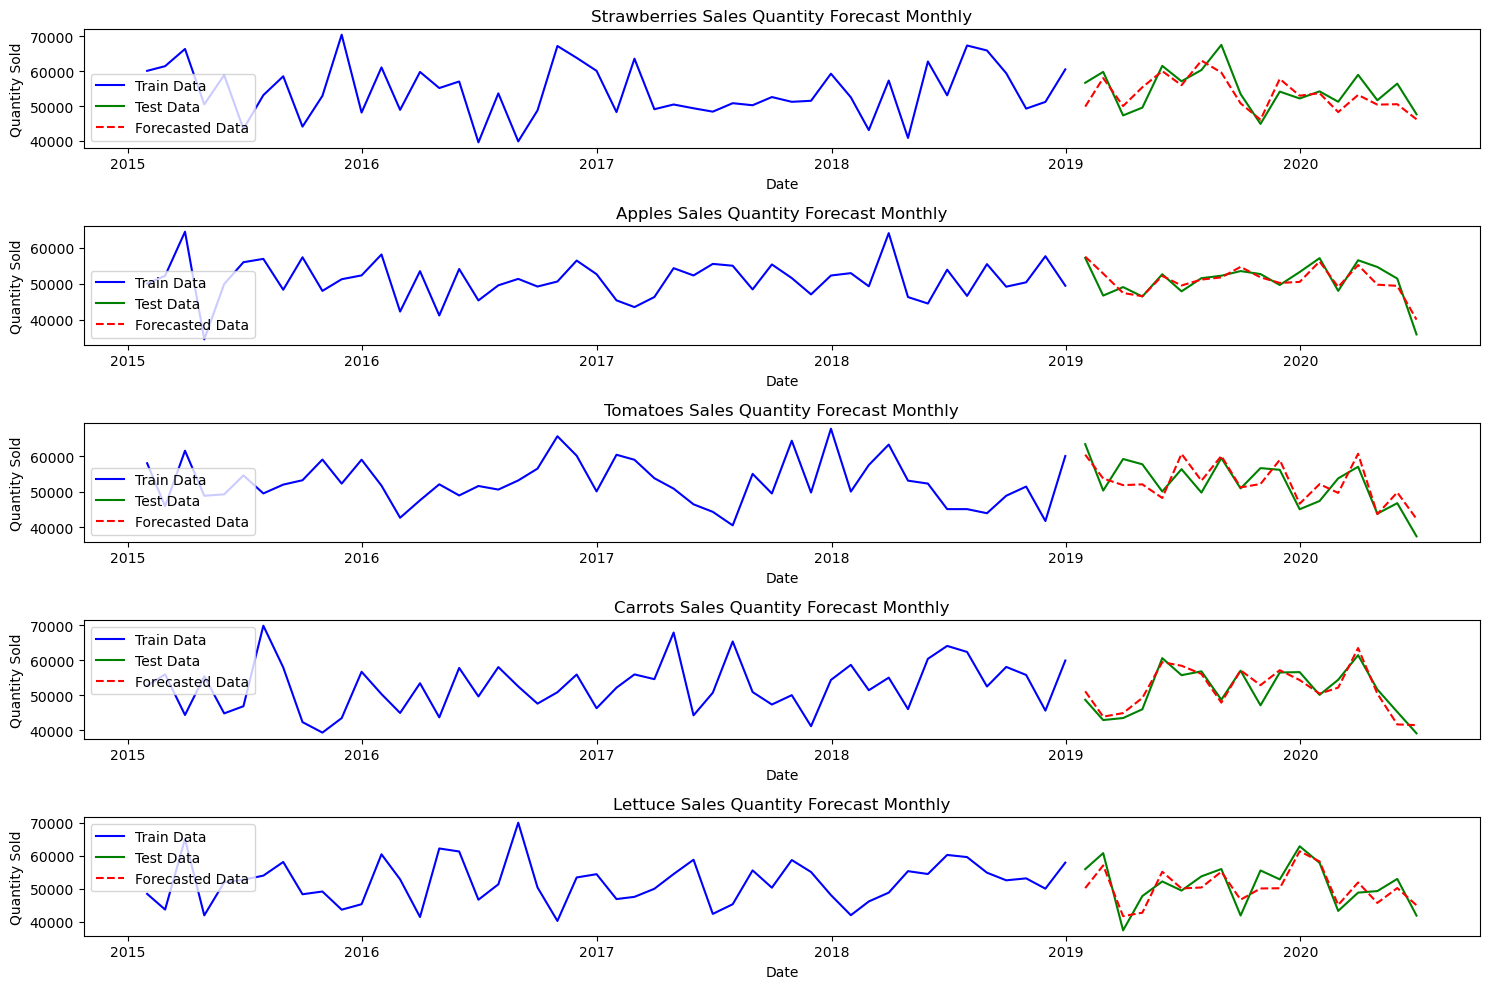

In [220]:
import matplotlib.pyplot as plt  # Import Matplotlib for visualization

plt.figure(figsize=(15, 10))  # Set the overall figure size (width=15, height=10)

# Loop through each product to create subplots
for i, product in enumerate(products):  
    plt.subplot(n_products, 1, i+1)  # Create a subplot for the current product
    # `n_products, 1` means: Create 'n_products' rows and 1 column of subplots
    # `i+1` ensures that each product gets its own subplot (indexing starts at 1)

    # Plot actual sales data from the training set
    plt.plot(rf_x_train_dates[product],  # X-axis: Training data dates
             rf_y_train[product],  # Y-axis: Actual quantity sold in training data
             label='Actual Quantity Sold (Train Data)',  # Legend label
             color='blue')  # Set the line color to blue

    # Plot actual sales data from the test set
    plt.plot(rf_x_test_dates[product],  # X-axis: Testing data dates
             rf_y_test[product],  # Y-axis: Actual quantity sold in test data
             label='Actual Quantity Sold (Test Data)',  # Legend label
             color='green')  # Set the line color to green

    # Plot forecasted sales (model predictions)
    plt.plot(rf_x_test_dates[product],  # X-axis: Testing data dates
             rf_forecasts[product],  # Y-axis: Forecasted sales quantity
             label='Forecasted Quantity to be Sold',  # Legend label
             color='red',  # Set the line color to red
             linestyle='--')  # Use a dashed line style for better differentiation

    plt.title(f'{product} Sales Quantity Forecast Monthly')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend(['Train Data', 'Test Data', 'Forecasted Data'])

plt.tight_layout()
plt.show()

## Conclusion 

In [248]:
import numpy as np
import pandas as pd

# Compute the average MAPE (Mean Absolute Percentage Error) for each model
arima_mape_scores['--Average--'] = np.mean([v for k, v in arima_mape_scores.items()])  # ARIMA model
prophet_mape_scores['--Average--'] = np.mean([v for k, v in prophet_mape_scores.items()])  # Prophet model
rf_mape_scores['--Average--'] = np.mean([v for k, v in rf_mape_scores.items()])  # Random Forest model

# Create a DataFrame to compare MAPE scores across different models
mape_comparison_df = pd.DataFrame({
    'ARIMA': arima_mape_scores,
    'Prophet': prophet_mape_scores,
    'RandomForestRegressor': rf_mape_scores
})

# Display the DataFrame
mape_comparison_df

ARIMA    Prophet  RandomForestRegressor
Lettuce       11.280264  16.485064               6.297990
--Average--    9.972584  13.280855               5.134477
Strawberries   8.252509   8.665478               5.640055
Apples         7.672138  10.521305               3.558923
Tomatoes      11.009154  12.012712               6.317644
Carrots       11.643805  18.719716               3.857772